<img src="https://imgur.com/XXT7Dbd.png" style="float:center;">


# <font color=#005757>1. Dicionários</font>

Um **dicionário** em Python é um tipo de "array associativo". Um dicionário pode conter qualquer tipo de objeto como seus valores, mas ao contrário de sequências como listas e tuplas, nas quais os itens são indexados por um número inteiro começando em 0, cada item em um dicionário é indexado por uma **chave única**, que pode ser qualquer objeto imutável. O dicionário, portanto, existe como **uma coleção de pares chave-valor**; os dicionários em si são objetos mutáveis.

In [1]:
# Um dicionário pode ser definido dando uma {chave: valor}:
# Estou usando https://pt.wikipedia.org/wiki/Lista_das_estruturas_mais_altas_do_mundo
dicionario_alturas = {
    "Burj Khalifa": 828,
    "Torre de rádio de Varsóvia": 646.4,
    "Tokyo Sky Tree": 634,
    "Torre da KVLY-TV": 628.8
}
dicionario_alturas

{'Burj Khalifa': 828,
 'Torre de rádio de Varsóvia': 646.4,
 'Tokyo Sky Tree': 634,
 'Torre da KVLY-TV': 628.8}

Podemos acessar um item indexando sua chave:

In [2]:
dicionario_alturas["Burj Khalifa"]

828

Podemos inclusive adicionar um novo par chave-valor:

In [3]:
dicionario_alturas["Plataforma Petronius"] = 610
dicionario_alturas

{'Burj Khalifa': 828,
 'Torre de rádio de Varsóvia': 646.4,
 'Tokyo Sky Tree': 634,
 'Torre da KVLY-TV': 628.8,
 'Plataforma Petronius': 610}

Uma forma alternativa de definir um dicionário é passar uma sequência de pares (chave, valor) para o construtor `dict`:

In [4]:
massa_em_kg = dict(mercurio = 3.301e23, venus = 4.867e24, terra = 5.972e24)
massa_em_kg["terra"]

5.972e+24

Os três métodos, `keys`, `values` e `items`, retornam, respectivamente, as chaves, valores e pares chave-valor de um dicionário (como tuplas). Por exemplo,

In [5]:
planetas = massa_em_kg.keys()
planetas

dict_keys(['mercurio', 'venus', 'terra'])

In [6]:
massas = massa_em_kg.values()
massas

dict_values([3.301e+23, 4.867e+24, 5.972e+24])

In [7]:
massa_em_kg.items()

dict_items([('mercurio', 3.301e+23), ('venus', 4.867e+24), ('terra', 5.972e+24)])

# <font color=#005757>2. Pandas: uma ferramenta de análise e manipulação de dados</font>

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width="400"/>
</div>

[Pandas](https://pandas.pydata.org/) é uma biblioteca de código aberto amplamente utilizada para manipulação e análise de dados. Ao contrário do NumPy, sua estrutura de dados básica semelhante a um array, o objeto `DataFrame`, pode conter tipos de dados heterogêneos (flutuantes, inteiros, strings, datas, etc.) que podem ser estruturados em uma hierarquia e indexados. Ele fornece um grande número de funções vetorizadas para limpar, transformar e agregar dados de forma eficiente, usando expressões semelhantes às usadas pelo NumPy. 

As principais estruturas de dados do pandas são `Series` e `DataFrame`, representando uma sequência unidimensional de valores e uma tabela de dados, respectivamente. Nesse curso, no entanto, vamos focar apenas nos `DataFrames`, afinal das contas DataFrames é basicamente uma coleção de Series.

In [8]:
import pandas as pd

## <font color=#005757>2.1. Criando um DataFrame</font>

Para criar um DataFrame simples a partir de um dicionário, atribua sequências de valores às chaves dos nomes das colunas:

In [9]:
dados = {
    "massa (kg)": [1.482e23 , 1.076e23 , 8.932e22 , 4.800e22 , 7.342e22],
    "raio (m)": [2.634e6 , None , 1.822e6 , None , 1.737e6],
    "planeta": ["Júpiter", "Júpiter", "Júpiter", "Júpiter", "Terra"]
    }

df = pd.DataFrame(dados)
df

,massa (kg),raio (m),planeta
0,1.482000e+23,2634000.0,Júpiter
1,1.076000e+23,NaN,Júpiter
2,8.932000e+22,1822000.0,Júpiter
3,4.800000e+22,NaN,Júpiter
4,7.342000e+22,1737000.0,Terra


In [10]:
# vamos modificar os índices!
indice = ["Ganimedes", "Calisto", "Io", "Europa", "Lua"]
df.index = indice
df

,massa (kg),raio (m),planeta
Ganimedes,1.482000e+23,2634000.0,Júpiter
Calisto,1.076000e+23,NaN,Júpiter
Io,8.932000e+22,1822000.0,Júpiter
Europa,4.800000e+22,NaN,Júpiter
Lua,7.342000e+22,1737000.0,Terra


In [11]:
# podemos também modificar o nome das colunas:
df.rename({"planeta": "planetas"}, axis = "columns", inplace = True)

# podemos modificar também o nome do índice:
df.rename({"Lua": "Nossa lua"}, inplace = True)

# Visualizando essas mudanças
df

,massa (kg),raio (m),planetas
Ganimedes,1.482000e+23,2634000.0,Júpiter
Calisto,1.076000e+23,NaN,Júpiter
Io,8.932000e+22,1822000.0,Júpiter
Europa,4.800000e+22,NaN,Júpiter
Nossa lua,7.342000e+22,1737000.0,Terra


## <font color=#005757>2.2. Acessando linhas, colunas e células</font>

Uma coluna individual pode ser obtida a indexando:

In [12]:
df["massa (kg)"]

Ganimedes    1.482000e+23
Calisto      1.076000e+23
Io           8.932000e+22
Europa       4.800000e+22
Nossa lua    7.342000e+22
Name: massa (kg), dtype: float64

In [13]:
# Podemos inclusive ser um valor a partir do índice
df["massa (kg)"]["Io"]

8.932e+22

Dois métodos do `DataFrame`, `loc` e `iloc`, podem ser usados para acessar e atribuir colunas, linhas e células de forma confiável; é altamente recomendado usá-los. `loc` seleciona linha e coluna pelo *label*:

In [14]:
df.loc["Europa"]

massa (kg)    48000000000000000000000.0
raio (m)                            NaN
planetas                        Júpiter
Name: Europa, dtype: object

In [15]:
# Podemos inclusive escolher quais informações queremos ver
df.loc["Europa", ["massa (kg)", "planetas"]]

massa (kg)    48000000000000000000000.0
planetas                        Júpiter
Name: Europa, dtype: object

In [16]:
# Ou queremos localizar vários índices para ver certas colunas:
df.loc[["Nossa lua", "Europa"], "planetas"]

Nossa lua      Terra
Europa       Júpiter
Name: planetas, dtype: object

Já o `iloc` seleciona linha e coluna pelo *índice*:

In [17]:
df.iloc[3]

massa (kg)    48000000000000000000000.0
raio (m)                            NaN
planetas                        Júpiter
Name: Europa, dtype: object

In [18]:
# Vamos selecionar todas as linhas, mas só a segunda e terceira coluna
df.iloc[:, [1, 2]]

,raio (m),planetas
Ganimedes,2634000.0,Júpiter
Calisto,NaN,Júpiter
Io,1822000.0,Júpiter
Europa,NaN,Júpiter
Nossa lua,1737000.0,Terra


## <font color=#005757>2.3. Importando e exportando DataFrames</font>

Os pandas podem ler uma [variedade de tipos](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) de arquivos usando seus métodos `pd.read_`. Vamos dar uma olhada nos tipos de dados mais comuns:

**OBSERVAÇÃO 1** Tenha em mente que ao referenciar os arquivos, você precisará certificar-se de que eles estão no mesmo local do seu notebook `.ipynb` (caso contrário, precisa passar o caminho relativo ou completo da onde está os dados).

**OBSERVAÇÃO 2** No Google Colab, se você importar os dados sem montar o Google Drive, lembre-se de que esses dados serão temporários e serão apagados quando a sessão do Colab terminar. Portanto, é recomendável montar o Google Drive para manter acesso aos dados entre sessões. Para montar você pode seguir os passos a seguir:

<div>
<img src="https://imgur.com/r1qjZOd.png" width="600"/>
</div>

<div>
<img src="https://imgur.com/VMlH3K9.png" width="600"/>
</div>


In [19]:
# Podemos ler um arquivo .txt usando read_csv!
planetas = pd.read_csv("../Dados/planetas.txt")
planetas

,planeta,distância (AU),massa (x M_terra),gravidade (x g_terra),diâmetro (km)
0,Mercúrio,0.387,0.0553,0.378,4879
1,Vênus,0.723,0.8150,0.905,12104
2,Terra,1.000,1.0000,1.000,12742
3,Marte,1.524,0.1070,0.379,6779
4,Júpiter,5.203,317.8300,2.530,139822
5,Saturno,9.537,95.1590,1.065,116464
6,Urano,19.191,14.5360,0.905,50724
7,Netuno,30.069,17.1470,1.140,49244


In [20]:
# E obviamente podemos abrir um arquivo .csv com read_csv!
exoplanetas = pd.read_csv("../Dados/exoplanetas.csv", comment="#")
exoplanetas

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380
1,11 Com b,2,1,Radial Velocity,2007,326.03000,0.32,-0.32,0.0,1.290,...,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,93.1846,1.92380,-1.92380
2,11 Com b,2,1,Radial Velocity,2007,323.21000,0.06,-0.05,0.0,1.178,...,2.85,-2.45,0.0,2.09,0.64,-0.63,0.0,93.1846,1.92380,-1.92380
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.20,-3.20,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650
4,11 UMi b,1,1,Radial Velocity,2009,NaN,NaN,NaN,NaN,1.510,...,NaN,NaN,NaN,1.70,0.40,-0.30,0.0,125.3210,1.97650,-1.97650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35959,ups And d,2,3,Radial Velocity,1999,1319.00000,18.00,-18.00,0.0,2.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,0.06350,-0.06290
35960,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.80,-1.30,0.0,1.180,...,3.15,-0.45,0.0,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630
35961,xi Aql b,1,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,0.580,...,NaN,NaN,NaN,1.40,0.20,-0.20,0.0,56.1858,0.55975,-0.55975
35962,xi Aql b,1,1,Radial Velocity,2007,136.75000,0.25,-0.25,0.0,0.680,...,NaN,NaN,0.0,2.20,NaN,NaN,0.0,56.1858,0.55975,-0.55975


In [109]:
# abrindo um arquivo xlsx (excel)
# https://dados.fortaleza.ce.gov.br/dataset/mqar-2024/resource/bfc749c0-28a0-4c91-a8f2-83e11a92aa8a
qualidade_ar_jan = pd.read_excel("../Dados/qualidade-do-ar-fortaleza.xlsx")
qualidade_ar_jan

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/01/2024 00:00,10.0,1.0,8.0,9.0,21.0,31.0,18.0,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0
1,01/01/2024 01:00,7.0,1.0,8.0,10.0,20.0,33.0,22.0,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN
2,01/01/2024 02:00,3.0,2.0,10.0,12.0,18.0,38.0,15.0,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN
3,01/01/2024 03:00,4.0,2.0,10.0,13.0,15.0,25.0,20.0,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN
4,01/01/2024 04:00,3.0,1.0,6.0,7.0,46.0,21.0,18.0,0.2,1.2,81.5,24.8,89.4,1002.1,0.0,29.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,mínimo,0.0,0.0,1.0,1.0,2.0,16.0,1.0,0.2,0.2,3.8,23.0,54.7,999.2,0.0,0.2,NaN
746,máximo,21.0,29.0,26.0,59.0,67.0,63.0,32.0,0.8,4.8,348.8,31.8,96.0,1006.0,1071.0,29.4,NaN
747,média,8.0,1.0,5.0,7.0,38.0,33.0,15.0,0.3,2.6,94.0,28.4,73.8,1002.9,NaN,NaN,NaN


In [110]:
# podemos ver também a outra planilha desse arquivo!
qualidade_ar_fev = pd.read_excel("../Dados/qualidade-do-ar-fortaleza.xlsx", sheet_name="fev2024")
qualidade_ar_fev

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/02/2024 00:00,6.0,0.0,2.0,3.0,44.0,29.0,19.0,0.2,2.4,98.0,28.2,76.7,1003.3,0.0,0.0,0.4
1,01/02/2024 01:00,5.0,0.0,2.0,2.0,45.0,30.0,15.0,0.2,2.6,98.4,28.1,75.2,1002.7,0.0,0.0,NaN
2,01/02/2024 02:00,6.0,0.0,1.0,2.0,47.0,29.0,16.0,0.2,2.5,102.0,28.0,74.8,1002.2,0.0,0.0,NaN
3,01/02/2024 03:00,6.0,0.0,1.0,2.0,47.0,28.0,16.0,0.2,2.2,102.2,28.0,75.4,1002.2,0.0,0.0,NaN
4,01/02/2024 04:00,7.0,0.0,2.0,2.0,48.0,27.0,12.0,0.2,2.2,96.8,27.9,74.9,1002.2,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,mínimo,1.0,0.0,1.0,2.0,1.0,10.0,5.0,0.1,0.1,3.8,22.1,46.1,998.7,0.0,0.2,NaN
746,máximo,17.0,32.0,32.0,70.0,76.0,97.0,45.0,1.3,5.3,359.0,31.5,99.0,1005.8,1077.0,31.1,NaN
747,média,9.0,2.0,8.0,12.0,34.0,33.0,17.0,0.3,2.0,130.4,27.5,81.2,1002.5,NaN,NaN,NaN


Ok... essas tabelas estão bem bagunçadas, mas podemos deixar como exercício para VOCÊ fazer um tratamento legal nelas!

In [23]:
# Podemos também obter dados de páginas HTML!
# Existem 3 tabelas nesse link, então vamos por índice
tempestade_solar = pd.read_html("https://en.wikipedia.org/wiki/List_of_solar_storms")[0]
tempestade_solar

,Date,Event,Significance
0,Mar 1582,Great magnetic storms of March 1582,Prolonged severe-extreme geomagnetic storm pro...
1,Feb 1730,NaN,At least as intense as the 1989 event but less...
2,Sep 1770,NaN,[41][42][43]
3,Sep 1859,Carrington Event,The most extreme storm ever documented by most...
4,Feb 1872,Chapman–Silverman storm,minimal Dst* ≤ −834 nT[44][45]
5,Nov 1882,November 1882 geomagnetic storm,[46]
6,Oct 1903,Solar storm of Oct-Nov 1903,"An extreme storm, estimated at Dst -531 nT aro..."
7,Sep 1909,Geomagnetic storm of September 1909,"Dst calculated to have reached -595 nT, compar..."
8,May 1921,May 1921 geomagnetic storm,Among most extreme known geomagnetic storms; f...
9,Jan 1938,January 1938 geomagnetic storm or the Fátima s...,NaN


Agora que sabemod como importar dados de vários tipos, podemos também salvar eles!

In [24]:
# Coloque index = False para evitar criar uma coluna chamada index
tempestade_solar.to_csv("../Dados/output_csv.csv", index = False)

In [25]:
# Também podemos salvar em xlsx
tempestade_solar.to_excel("../Dados/output_excel.xlsx", sheet_name="Planilha1")

## <font color=#005757>2.4. Ordenação, operações e estatística</font>

Como era de se esperar, muitas das funções mais úteis para análise de dados estão disponíveis no pandas. Vamos usar o DataFrame que importamos de exoplanetas:

In [26]:
# Uma visualização rápida do dataframe use head()
# para ver os 5 últimos elementos, faça tail()
exoplanetas.head()

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,93.1846,1.9238,-1.9238
1,11 Com b,2,1,Radial Velocity,2007,326.03000,0.32,-0.32,0.0,1.290,...,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,93.1846,1.9238,-1.9238
2,11 Com b,2,1,Radial Velocity,2007,323.21000,0.06,-0.05,0.0,1.178,...,2.85,-2.45,0.0,2.09,0.64,-0.63,0.0,93.1846,1.9238,-1.9238
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.20,-3.20,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.3210,1.9765,-1.9765
4,11 UMi b,1,1,Radial Velocity,2009,NaN,NaN,NaN,NaN,1.510,...,NaN,NaN,NaN,1.70,0.40,-0.30,0.0,125.3210,1.9765,-1.9765


In [27]:
# Ver apenas o nome das colunas, use columns
exoplanetas.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'sy_dist', 'sy_disterr1', 'sy_disterr2'],
      dtype='object')

In [28]:
# Quer ver a estrutura "completa" do dataframe? faça .info()
exoplanetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35964 entries, 0 to 35963
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          35964 non-null  object 
 1   sy_snum          35964 non-null  int64  
 2   sy_pnum          35964 non-null  int64  
 3   discoverymethod  35964 non-null  object 
 4   disc_year        35964 non-null  int64  
 5   pl_orbper        32854 non-null  float64
 6   pl_orbpererr1    31369 non-null  float64
 7   pl_orbpererr2    31368 non-null  float64
 8   pl_orbperlim     32854 non-null  float64
 9   pl_orbsmax       19736 non-null  float64
 10  pl_orbsmaxerr1   5291 non-null   float64
 11  pl_orbsmaxerr2   5290 non-null   float64
 12  pl_orbsmaxlim    22512 non-null  float64
 13  pl_rade          24449 non-null  float64
 14  pl_radeerr1      23720 non-null  float64
 15  pl_radeerr2      23720 non-null  float64
 16  pl_radelim       27191 non-null  float64
 17  pl_bmasse   

In [29]:
# Podemos acessar uma coluna tal como o dicionário
exoplanetas["discoverymethod"]

0        Radial Velocity
1        Radial Velocity
2        Radial Velocity
3        Radial Velocity
4        Radial Velocity
              ...       
35959    Radial Velocity
35960    Radial Velocity
35961    Radial Velocity
35962    Radial Velocity
35963    Radial Velocity
Name: discoverymethod, Length: 35964, dtype: object

In [30]:
## podemos criar novas colunas a partir da operação de duas ou mais colunas

# Primeiro vamos transformar raio do planeta (que tá em raios terrestres) em km
exoplanetas["raio planeta (km)"] = exoplanetas["pl_rade"] * 6378

# e o mesmo para o raio da estrela (que tá em raios solares)
exoplanetas["raio estrela (km)"] = exoplanetas["st_rad"] * 695700

# agora podemos criar outro que é a divisão de um pelo outro
exoplanetas["r_p/r_e"] = exoplanetas["raio planeta (km)"] / exoplanetas["raio estrela (km)"]

In [31]:
# vamos ver novamente:
# caso não consiga ver é pq alguns valores são nulos de natureza, precisamos cuidar disso depois
exoplanetas.head()

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,2.60,0.40,-0.30,0.0,93.1846,1.9238,-1.9238,NaN,NaN,NaN
1,11 Com b,2,1,Radial Velocity,2007,326.03000,0.32,-0.32,0.0,1.290,...,2.70,0.30,-0.30,0.0,93.1846,1.9238,-1.9238,NaN,13218300.0,NaN
2,11 Com b,2,1,Radial Velocity,2007,323.21000,0.06,-0.05,0.0,1.178,...,2.09,0.64,-0.63,0.0,93.1846,1.9238,-1.9238,NaN,9572832.0,NaN
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.20,-3.20,0.0,1.530,...,2.78,0.69,-0.69,0.0,125.3210,1.9765,-1.9765,NaN,20724903.0,NaN
4,11 UMi b,1,1,Radial Velocity,2009,NaN,NaN,NaN,NaN,1.510,...,1.70,0.40,-0.30,0.0,125.3210,1.9765,-1.9765,NaN,NaN,NaN


In [32]:
# podemos ver as estatísticas gerais das colunas numéricas
exoplanetas.describe()

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
count,35964.000000,35964.000000,35964.000000,3.285400e+04,3.136900e+04,3.136800e+04,32854.000000,19736.000000,5291.000000,5290.000000,...,30409.000000,25010.000000,24815.000000,30409.000000,35132.000000,34297.000000,34297.000000,2.444900e+04,3.310900e+04,24139.000000
mean,1.085530,1.884551,2015.320237,1.328807e+04,1.536586e+04,-3.619213e+03,-0.000244,3.174328,1.426282,-0.945279,...,0.943830,0.110596,-0.095999,-0.000066,732.538329,35.347832,-36.313474,3.372458e+04,8.035067e+05,0.052595
std,0.309859,1.205548,3.815719,2.219136e+06,2.653865e+06,5.659217e+05,0.020642,94.366226,71.738044,30.882566,...,0.322797,0.649656,0.650537,0.018134,787.356749,147.954122,170.606639,4.459988e+05,1.281362e+06,0.816084
min,1.000000,1.000000,1992.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,-2060.000000,...,0.000000,0.000000,-97.100000,-1.000000,1.301190,0.000340,-2900.000000,1.722060e+03,6.957000e+03,0.003215
25%,1.000000,1.000000,2014.000000,4.378080e+00,8.000000e-06,-2.013000e-04,0.000000,0.054200,0.000885,-0.060000,...,0.810000,0.050000,-0.110000,0.000000,297.462000,2.344000,-21.495000,9.885900e+03,5.496030e+05,0.015481
50%,1.000000,1.000000,2016.000000,1.035742e+01,3.867000e-05,-3.878000e-05,0.000000,0.101000,0.003000,-0.003100,...,0.960000,0.080000,-0.070000,0.000000,601.629000,8.090500,-7.933000,1.454184e+04,6.609150e+05,0.023169
75%,1.000000,2.000000,2016.000000,2.680530e+01,2.013000e-04,-8.000000e-06,0.000000,0.219700,0.058000,-0.000900,...,1.070000,0.130000,-0.050000,0.000000,945.775000,22.140000,-2.312000,2.057543e+04,8.417970e+05,0.034406
max,4.000000,8.000000,2024.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,7506.000000,5205.000000,0.000000,...,23.560000,97.100000,0.000000,1.000000,8800.000000,3720.230000,2700.000000,2.731685e+07,6.154858e+07,62.325821


In [33]:
## ou podemos fazer isso para uma coluna única:
# valor mínimo
exoplanetas["pl_orbper"].min()

0.09070629

In [34]:
# valor máximo
exoplanetas["pl_orbper"].max()

402000000.0

In [35]:
## podemos ver também a correlação dos dados
exoplanetas.corr(numeric_only=True)

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
sy_snum,1.000000,0.061346,-0.195202,-0.001041,-0.001330,0.000149,0.003298,0.002484,-0.004908,0.004294,...,0.058773,0.029117,-0.033392,-0.029084,-0.164431,-0.045664,0.038742,0.006759,0.017043,0.005970
sy_pnum,0.061346,1.000000,-0.200479,-0.004365,-0.004249,0.004683,-0.007147,-0.021567,-0.011515,0.017549,...,-0.098693,-0.023193,0.021730,-0.013786,-0.125158,-0.102918,0.095444,-0.016904,-0.063065,-0.011899
disc_year,-0.195202,-0.200479,1.000000,0.008089,0.008414,-0.008074,-0.004806,0.013239,0.017063,-0.024729,...,-0.125099,-0.003486,0.008298,-0.001113,0.194989,0.154713,-0.149527,-0.009383,-0.055161,-0.002076
pl_orbper,-0.001041,-0.004365,0.008089,1.000000,0.999697,-0.999058,0.000052,0.996031,0.999697,-0.996298,...,-0.011260,-0.000876,0.000738,0.000048,-0.007420,-0.002119,0.002401,0.000686,-0.002338,0.001989
pl_orbpererr1,-0.001330,-0.004249,0.008414,0.999697,1.000000,-0.998435,0.000046,0.994863,0.999730,-0.995313,...,-0.011179,-0.000865,0.000731,0.000048,-0.007619,-0.002158,0.002464,0.000636,-0.002335,0.001870
pl_orbpererr2,0.000149,0.004683,-0.008074,-0.999058,-0.998435,1.000000,-0.000050,-0.997254,-0.999246,0.998774,...,0.011182,0.000875,-0.000732,-0.000050,0.007685,0.002171,-0.002478,-0.000692,0.002341,-0.001892
pl_orbperlim,0.003298,-0.007147,-0.004806,0.000052,0.000046,-0.000050,1.000000,-0.001868,-0.001017,0.003223,...,0.004322,0.001092,-0.000892,-0.000088,0.012413,0.004214,-0.004760,NaN,0.001254,NaN
pl_orbsmax,0.002484,-0.021567,0.013239,0.996031,0.994863,-0.997254,-0.001868,1.000000,0.620313,-0.601501,...,-0.010568,-0.002074,0.001110,0.000277,-0.018569,-0.003698,0.003070,0.001452,-0.000138,0.002221
pl_orbsmaxerr1,-0.004908,-0.011515,0.017063,0.999697,0.999730,-0.999246,-0.001017,0.620313,1.000000,-0.926553,...,-0.010730,-0.002174,0.002063,0.000533,-0.004470,-0.002295,0.002182,0.015660,-0.004494,0.022365
pl_orbsmaxerr2,0.004294,0.017549,-0.024729,-0.996298,-0.995313,0.998774,0.003223,-0.601501,-0.926553,1.000000,...,0.016071,-0.000100,-0.000820,-0.000791,-0.003296,-0.016678,0.009220,-0.018968,0.004215,-0.022662


In [36]:
# vamos ver só com o período orbital
correlacoes_periodo_orbital = exoplanetas.corr(numeric_only=True)["pl_orbper"]
correlacoes_periodo_orbital

sy_snum             -0.001041
sy_pnum             -0.004365
disc_year            0.008089
pl_orbper            1.000000
pl_orbpererr1        0.999697
pl_orbpererr2       -0.999058
pl_orbperlim         0.000052
pl_orbsmax           0.996031
pl_orbsmaxerr1       0.999697
pl_orbsmaxerr2      -0.996298
pl_orbsmaxlim        0.000062
pl_rade              0.000686
pl_radeerr1         -0.000272
pl_radeerr2          0.000308
pl_radelim           0.000025
pl_bmasse            0.016354
pl_bmasseerr1        0.011787
pl_bmasseerr2       -0.017716
pl_bmasselim        -0.002788
st_teff             -0.012206
st_tefferr1         -0.004015
st_tefferr2          0.004088
st_tefflim          -0.000034
st_rad              -0.002338
st_raderr1          -0.001513
st_raderr2           0.001288
st_radlim                 NaN
st_mass             -0.011260
st_masserr1         -0.000876
st_masserr2          0.000738
st_masslim           0.000048
sy_dist             -0.007420
sy_disterr1         -0.002119
sy_disterr

In [37]:
# quando queremos ver a correlação, queremos saber quem é mais correlacioado!
# ascending = True (do menor para o maior)
# ascending = False (do maior para o menor) 
correlacoes_periodo_orbital.sort_values(ascending = False)

pl_orbper            1.000000
pl_orbsmaxerr1       0.999697
pl_orbpererr1        0.999697
pl_orbsmax           0.996031
pl_bmasse            0.016354
pl_bmasseerr1        0.011787
disc_year            0.008089
st_tefferr2          0.004088
sy_disterr2          0.002401
r_p/r_e              0.001989
st_raderr2           0.001288
st_masserr2          0.000738
raio planeta (km)    0.000686
pl_rade              0.000686
pl_radeerr2          0.000308
pl_orbsmaxlim        0.000062
pl_orbperlim         0.000052
st_masslim           0.000048
pl_radelim           0.000025
st_tefflim          -0.000034
pl_radeerr1         -0.000272
st_masserr1         -0.000876
sy_snum             -0.001041
st_raderr1          -0.001513
sy_disterr1         -0.002119
st_rad              -0.002338
raio estrela (km)   -0.002338
pl_bmasselim        -0.002788
st_tefferr1         -0.004015
sy_pnum             -0.004365
sy_dist             -0.007420
st_mass             -0.011260
st_teff             -0.012206
pl_bmassee

# <font color=#005757>3. Limpeza e exploração de dados</font>

Qualquer investigação científica, particularmente investigação experimental, irá gerar conjuntos de dados contendo valores inválidos ou em falta. Os pontos de dados podem cair ou ficar fora da faixa detectável do instrumento de medição, podem ser transcritos incorretamente ou obtidos de forma incompleta de várias fontes. O pandas fornece uma variedade de métodos para lidar com esses valores ausentes, incluindo funções para removê-los ou substituí-los por outros valores.

## <font color=#005757>3.1. Valores ausentes </font>

In [38]:
# podemos usar o dropna() para apagar todas as linhas que tem NaN
exoplanetas_sem_linhas_null = exoplanetas.dropna()
exoplanetas_sem_linhas_null

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
190,BD+20 594 b,1,1,Transit,2016,4.168550e+01,3.000000e-03,-3.100000e-03,0.0,0.24100,...,0.96,0.03,-0.03,0.0,179.4610,1.2570,-1.2400,14222.940,647001.0,0.021983
225,COCONUTS-2 b,1,1,Imaging,2021,4.020000e+08,4.700000e+08,-1.000000e+08,0.0,7506.00000,...,0.37,0.02,-0.02,0.0,10.8864,0.0041,-0.0042,79355.076,271323.0,0.292475
236,CoRoT-10 b,1,1,Transit,2010,1.324060e+01,2.000000e-04,-2.000000e-04,0.0,0.10550,...,0.89,0.05,-0.05,0.0,338.3860,3.9865,-3.9865,69328.860,549603.0,0.126144
237,CoRoT-11 b,1,1,Transit,2010,2.994330e+00,1.100000e-05,-1.100000e-05,0.0,0.04360,...,1.27,0.05,-0.05,0.0,655.0370,24.9470,-23.2090,102239.340,953109.0,0.107269
250,CoRoT-13 b,1,1,Transit,2010,4.035190e+00,3.000000e-05,-3.000000e-05,0.0,0.05100,...,1.09,0.02,-0.02,0.0,1148.9300,62.1200,-56.1500,63269.760,702657.0,0.090044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35758,XO-1 b,1,1,Transit,2006,3.941534e+00,2.700000e-05,-2.700000e-05,0.0,0.04880,...,1.00,0.02,-0.03,0.0,163.5530,0.6220,-0.6170,92940.216,695700.0,0.133592
35787,XO-3 b,1,1,Transit,2007,3.191543e+00,1.400000e-04,-1.400000e-04,0.0,0.04760,...,1.41,0.08,-0.08,0.0,213.0530,2.7240,-2.6580,139410.324,1481841.0,0.094079
35818,XO-5 b,1,1,Transit,2008,4.187732e+00,2.000000e-05,-2.000000e-05,0.0,0.05080,...,1.00,0.03,-0.03,0.0,276.2110,3.9190,-3.8120,82212.420,772227.0,0.106461
35826,XO-7 b,1,1,Transit,2019,2.864142e+00,4.300000e-06,-4.300000e-06,0.0,0.04421,...,1.41,0.06,-0.06,0.0,234.1490,1.1940,-1.1810,98157.420,1029636.0,0.095332


In [39]:
# ou podemos apagar todas as colunas que tem valores NaN
exoplanetas_sem_colunas_null = exoplanetas.dropna(axis = "columns") # ou axis = 1
exoplanetas_sem_colunas_null

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year
0,11 Com b,2,1,Radial Velocity,2007
1,11 Com b,2,1,Radial Velocity,2007
2,11 Com b,2,1,Radial Velocity,2007
3,11 UMi b,1,1,Radial Velocity,2009
4,11 UMi b,1,1,Radial Velocity,2009
...,...,...,...,...,...
35959,ups And d,2,3,Radial Velocity,1999
35960,ups Leo b,1,1,Radial Velocity,2021
35961,xi Aql b,1,1,Radial Velocity,2007
35962,xi Aql b,1,1,Radial Velocity,2007


In [40]:
# podemos também apagar de os valores nulos de uma coluna específica (ou colunas)
exoplanetas.dropna(subset=["pl_orbper"])

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
1,11 Com b,2,1,Radial Velocity,2007,326.03000,0.32,-0.32,0.0,1.290,...,2.70,0.30,-0.30,0.0,93.1846,1.92380,-1.92380,NaN,13218300.0,NaN
2,11 Com b,2,1,Radial Velocity,2007,323.21000,0.06,-0.05,0.0,1.178,...,2.09,0.64,-0.63,0.0,93.1846,1.92380,-1.92380,NaN,9572832.0,NaN
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.20,-3.20,0.0,1.530,...,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650,NaN,20724903.0,NaN
5,11 UMi b,1,1,Radial Velocity,2009,516.22000,3.25,-3.25,0.0,1.540,...,1.80,0.25,-0.25,0.0,125.3210,1.97650,-1.97650,NaN,16752456.0,NaN
6,14 And b,1,1,Radial Velocity,2008,186.76000,0.11,-0.12,0.0,0.775,...,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400,NaN,8035335.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35958,ups And d,2,3,Radial Velocity,1999,1274.60000,5.00,-5.00,0.0,2.510,...,NaN,NaN,NaN,NaN,13.4054,0.06350,-0.06290,NaN,NaN,NaN
35959,ups And d,2,3,Radial Velocity,1999,1319.00000,18.00,-18.00,0.0,2.570,...,NaN,NaN,NaN,NaN,13.4054,0.06350,-0.06290,NaN,NaN,NaN
35960,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.80,-1.30,0.0,1.180,...,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630,NaN,7805754.0,NaN
35962,xi Aql b,1,1,Radial Velocity,2007,136.75000,0.25,-0.25,0.0,0.680,...,2.20,NaN,NaN,0.0,56.1858,0.55975,-0.55975,NaN,8348400.0,NaN


Uma alternativa para eliminar os valores `NaN` é substituí-los por dados válidos de acordo com algum processo. Este é o propósito do método `fillna()`. Opções comuns são fornecidas nos exemplos a seguir:

In [41]:
# Não faz nenhum sentido para só para você ver como ficaria
exoplanetas.fillna(value = "VALOR PREENCHIDO")

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,1.21,...,2.6,0.4,-0.3,0.0,93.1846,1.9238,-1.9238,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO
1,11 Com b,2,1,Radial Velocity,2007,326.03,0.32,-0.32,0.0,1.29,...,2.7,0.3,-0.3,0.0,93.1846,1.9238,-1.9238,VALOR PREENCHIDO,13218300.0,VALOR PREENCHIDO
2,11 Com b,2,1,Radial Velocity,2007,323.21,0.06,-0.05,0.0,1.178,...,2.09,0.64,-0.63,0.0,93.1846,1.9238,-1.9238,VALOR PREENCHIDO,9572832.0,VALOR PREENCHIDO
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.2,-3.2,0.0,1.53,...,2.78,0.69,-0.69,0.0,125.321,1.9765,-1.9765,VALOR PREENCHIDO,20724903.0,VALOR PREENCHIDO
4,11 UMi b,1,1,Radial Velocity,2009,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,1.51,...,1.7,0.4,-0.3,0.0,125.321,1.9765,-1.9765,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35959,ups And d,2,3,Radial Velocity,1999,1319.0,18.0,-18.0,0.0,2.57,...,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,13.4054,0.0635,-0.0629,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO
35960,ups Leo b,1,1,Radial Velocity,2021,385.2,2.8,-1.3,0.0,1.18,...,1.48,0.9,-0.38,0.0,52.5973,0.9272,-0.8963,VALOR PREENCHIDO,7805754.0,VALOR PREENCHIDO
35961,xi Aql b,1,1,Radial Velocity,2007,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO,0.58,...,1.4,0.2,-0.2,0.0,56.1858,0.55975,-0.55975,VALOR PREENCHIDO,VALOR PREENCHIDO,VALOR PREENCHIDO
35962,xi Aql b,1,1,Radial Velocity,2007,136.75,0.25,-0.25,0.0,0.68,...,2.2,VALOR PREENCHIDO,VALOR PREENCHIDO,0.0,56.1858,0.55975,-0.55975,VALOR PREENCHIDO,8348400.0,VALOR PREENCHIDO


In [42]:
# Mas você pode substituir os dados pelo valor médio, por exemplo:
exoplanetas["pl_orbper"].fillna(value = exoplanetas["pl_orbper"].mean())

0        13288.068007
1          326.030000
2          323.210000
3          516.219970
4        13288.068007
             ...     
35959     1319.000000
35960      385.200000
35961    13288.068007
35962      136.750000
35963      136.970000
Name: pl_orbper, Length: 35964, dtype: float64

In [43]:
# ou de todas as colunas:
exoplanetas.fillna(value = exoplanetas.mean(numeric_only=True))

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,13288.068007,15365.855558,-3619.212518,-0.000244,1.210,...,2.60000,0.400000,-0.300000,0.000000,93.1846,1.92380,-1.92380,33724.584,8.035067e+05,0.052595
1,11 Com b,2,1,Radial Velocity,2007,326.030000,0.320000,-0.320000,0.000000,1.290,...,2.70000,0.300000,-0.300000,0.000000,93.1846,1.92380,-1.92380,33724.584,1.321830e+07,0.052595
2,11 Com b,2,1,Radial Velocity,2007,323.210000,0.060000,-0.050000,0.000000,1.178,...,2.09000,0.640000,-0.630000,0.000000,93.1846,1.92380,-1.92380,33724.584,9.572832e+06,0.052595
3,11 UMi b,1,1,Radial Velocity,2009,516.219970,3.200000,-3.200000,0.000000,1.530,...,2.78000,0.690000,-0.690000,0.000000,125.3210,1.97650,-1.97650,33724.584,2.072490e+07,0.052595
4,11 UMi b,1,1,Radial Velocity,2009,13288.068007,15365.855558,-3619.212518,-0.000244,1.510,...,1.70000,0.400000,-0.300000,0.000000,125.3210,1.97650,-1.97650,33724.584,8.035067e+05,0.052595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35959,ups And d,2,3,Radial Velocity,1999,1319.000000,18.000000,-18.000000,0.000000,2.570,...,0.94383,0.110596,-0.095999,-0.000066,13.4054,0.06350,-0.06290,33724.584,8.035067e+05,0.052595
35960,ups Leo b,1,1,Radial Velocity,2021,385.200000,2.800000,-1.300000,0.000000,1.180,...,1.48000,0.900000,-0.380000,0.000000,52.5973,0.92720,-0.89630,33724.584,7.805754e+06,0.052595
35961,xi Aql b,1,1,Radial Velocity,2007,13288.068007,15365.855558,-3619.212518,-0.000244,0.580,...,1.40000,0.200000,-0.200000,0.000000,56.1858,0.55975,-0.55975,33724.584,8.035067e+05,0.052595
35962,xi Aql b,1,1,Radial Velocity,2007,136.750000,0.250000,-0.250000,0.000000,0.680,...,2.20000,0.110596,-0.095999,0.000000,56.1858,0.55975,-0.55975,33724.584,8.348400e+06,0.052595


**OBSERVAÇÃO** observe que não estamos em nenhum momento modificando o dataframe original `exoplanetas`, só faria isso se fizemos, por exemplo, `exoplanetas = exoplanetas.fillna(value = exoplanetas.mean(numeric_only=True))` ou `exoplanetas.fillna(value = exoplanetas.mean(numeric_only=True), inplace = True)`.

Pode ser que o conjunto de dados usado use um valor diferente para indicar dados inválidos, por exemplo `-1` ou `-99`. O método replace pode canonizar esses dados:

In [44]:
import numpy as np

# No nosso caso a gente não tem -1, -99, vamos só substituir np.nan por 0
exoplanetas["raio planeta (km)"].replace(np.nan, 0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
35959    0.0
35960    0.0
35961    0.0
35962    0.0
35963    0.0
Name: raio planeta (km), Length: 35964, dtype: float64

In [45]:
# Podemos substituir pelo o que quisermos!
exoplanetas["discoverymethod"].replace("Radial Velocity", "Velocidade Radial")

0        Velocidade Radial
1        Velocidade Radial
2        Velocidade Radial
3        Velocidade Radial
4        Velocidade Radial
               ...        
35959    Velocidade Radial
35960    Velocidade Radial
35961    Velocidade Radial
35962    Velocidade Radial
35963    Velocidade Radial
Name: discoverymethod, Length: 35964, dtype: object

In [46]:
# Ou até mesmo um conjunto de mudanças, pra isso precisa de um dicionario
teste = exoplanetas["discoverymethod"].replace({"Radial Velocity": "Velocidade Radial", 
                                        "Imaging": "Imagem direta"})
teste

0        Velocidade Radial
1        Velocidade Radial
2        Velocidade Radial
3        Velocidade Radial
4        Velocidade Radial
               ...        
35959    Velocidade Radial
35960    Velocidade Radial
35961    Velocidade Radial
35962    Velocidade Radial
35963    Velocidade Radial
Name: discoverymethod, Length: 35964, dtype: object

In [47]:
# Veja que não vimos nossa mudança aqui, mas podemos ver os valores únicos usando unique()
teste.unique()

array(['Velocidade Radial', 'Imagem direta', 'Eclipse Timing Variations',
       'Transit', 'Transit Timing Variations', 'Astrometry',
       'Disk Kinematics', 'Microlensing', 'Orbital Brightness Modulation',
       'Pulsation Timing Variations', 'Pulsar Timing'], dtype=object)

## <font color=#005757>3.2. Valores duplicados </font>

Podemos ver a frequência dos dados da seguinte maneira:

In [48]:
# Digamos que queremos ver a frequência dos dados
exoplanetas["disc_year"].value_counts()

disc_year
2016    12875
2014     9009
2021     2638
2012     1083
2011     1025
2013     1010
2018      966
2023      950
2015      904
2020      861
2022      753
2010      602
2017      568
2019      545
2009      419
2008      326
2007      318
2004      173
2005      157
2006      148
2002      144
2024       95
2003       86
1999       79
2000       77
2001       57
1996       41
1998       38
1992        6
1995        5
1997        4
1994        2
Name: count, dtype: int64

In [49]:
# Ou em porcentagem
exoplanetas["disc_year"].value_counts(normalize=True)

disc_year
2016    0.357997
2014    0.250501
2021    0.073351
2012    0.030113
2011    0.028501
2013    0.028084
2018    0.026860
2023    0.026415
2015    0.025136
2020    0.023941
2022    0.020938
2010    0.016739
2017    0.015794
2019    0.015154
2009    0.011651
2008    0.009065
2007    0.008842
2004    0.004810
2005    0.004365
2006    0.004115
2002    0.004004
2024    0.002642
2003    0.002391
1999    0.002197
2000    0.002141
2001    0.001585
1996    0.001140
1998    0.001057
1992    0.000167
1995    0.000139
1997    0.000111
1994    0.000056
Name: proportion, dtype: float64

Podemos usar o `drop_duplicates()` para eliminar valores duplicados:

In [50]:
# Uma coluna que claramente não faz sentido ter valores duplicados é o nome dos exoplanetas, vamos dropar:
# por padrão ele deixa o primeiro caso
exoplanetas.drop_duplicates(["pl_name"])

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380,NaN,NaN,NaN
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650,NaN,20724903.0,NaN
6,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400,NaN,8035335.0,NaN
9,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730,NaN,NaN,NaN
17,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110,NaN,807012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35941,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290,NaN,NaN,NaN
35948,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290,NaN,1140948.0,NaN
35954,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290,NaN,1127034.0,NaN
35960,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.800,-1.300,0.0,1.180,...,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630,NaN,7805754.0,NaN


In [51]:
# vamos fixar isso como nosso novo dataframe:
exoplanetas_novo = exoplanetas.drop_duplicates(["pl_name"])
exoplanetas_novo

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380,NaN,NaN,NaN
3,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650,NaN,20724903.0,NaN
6,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400,NaN,8035335.0,NaN
9,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730,NaN,NaN,NaN
17,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110,NaN,807012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35941,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290,NaN,NaN,NaN
35948,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290,NaN,1140948.0,NaN
35954,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290,NaN,1127034.0,NaN
35960,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.800,-1.300,0.0,1.180,...,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630,NaN,7805754.0,NaN


In [52]:
# O que acontece muito em casos em que eliminamos linhas é que o índice fica todo bagunçado!
# vamos arrumar isso com o reset_index:
exoplanetas_novo.reset_index(drop = True, inplace = True)

In [53]:
# drop = True faz com que evite criar uma coluna chamada index
# inplace = True faz com que essa operação "respingue" no dataframe original
exoplanetas_novo

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380,NaN,NaN,NaN
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650,NaN,20724903.0,NaN
2,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400,NaN,8035335.0,NaN
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730,NaN,NaN,NaN
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110,NaN,807012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290,NaN,NaN,NaN
5626,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290,NaN,1140948.0,NaN
5627,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290,NaN,1127034.0,NaN
5628,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.800,-1.300,0.0,1.180,...,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630,NaN,7805754.0,NaN


## <font color=#005757>3.3. Removendo colunas e linhas </font>

In [54]:
# Para remover colunas façamos:
exoplanetas_novo.drop("pl_orbpererr1", axis = "columns") # mesma coisa para axis = 1

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,1.210,0.060,...,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380,NaN,NaN,NaN
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,-3.200,0.0,1.530,0.070,...,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650,NaN,20724903.0,NaN
2,14 And b,1,1,Radial Velocity,2008,186.76000,-0.120,0.0,0.775,0.000,...,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400,NaN,8035335.0,NaN
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,-2.500,0.0,2.770,0.050,...,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730,NaN,NaN,NaN
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,-0.150,0.0,1.676,0.025,...,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110,NaN,807012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,2,3,Radial Velocity,1996,4.61100,-0.005,0.0,0.057,NaN,...,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290,NaN,NaN,NaN
5626,ups And c,2,3,Radial Velocity,1999,240.94020,-0.047,0.0,0.829,0.043,...,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290,NaN,1140948.0,NaN
5627,ups And d,2,3,Radial Velocity,1999,1282.41000,-0.940,0.0,2.517,0.026,...,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290,NaN,1127034.0,NaN
5628,ups Leo b,1,1,Radial Velocity,2021,385.20000,-1.300,0.0,1.180,0.110,...,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630,NaN,7805754.0,NaN


In [55]:
# podemos remover mais de uma coluna (vamos remover aquelas que criamos):
lista_colunas_remover = ['raio planeta (km)', 'raio estrela (km)', 'r_p/r_e']
exoplanetas_novo = exoplanetas_novo.drop(lista_colunas_remover, axis = 1)

In [56]:
exoplanetas_novo

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650
2,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.12,-0.51,0.0,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.03,-0.03,0.0,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,NaN,NaN,NaN,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290
5626,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,0.04,-0.05,0.0,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290
5627,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,0.04,-0.04,0.0,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290
5628,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.800,-1.300,0.0,1.180,...,3.15,-0.45,0.0,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630


In [57]:
# para remover uma linha, você tem que colocar o índice:
# eliminando a primeira linha
exoplanetas_novo.drop(exoplanetas_novo.index[0])

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650
2,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.12,-0.51,0.0,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.03,-0.03,0.0,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110
5,17 Sco b,1,1,Radial Velocity,2020,578.38000,2.010,-2.090,0.0,1.450,...,0.78,-0.74,0.0,1.22,0.13,-0.14,0.0,124.9530,2.59000,-2.59000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,NaN,NaN,NaN,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290
5626,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,0.04,-0.05,0.0,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290
5627,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,0.04,-0.04,0.0,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290
5628,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.800,-1.300,0.0,1.180,...,3.15,-0.45,0.0,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630


In [58]:
# eliminando a última linha
exoplanetas_novo.drop(exoplanetas_novo.index[-1])

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,93.1846,1.9238,-1.9238
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.3210,1.9765,-1.9765
2,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.12,-0.51,0.0,1.78,0.43,-0.29,0.0,75.4392,0.7140,-0.7140
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9323,0.0073,-0.0073
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.03,-0.03,0.0,0.98,0.04,-0.04,0.0,21.1397,0.0110,-0.0111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,tau Gem b,1,1,Radial Velocity,2013,305.50000,0.100,-0.100,0.0,1.170,...,0.70,-0.70,0.0,2.30,0.30,-0.30,0.0,112.5370,4.2530,-3.9590
5625,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,NaN,NaN,NaN,1.20,NaN,NaN,0.0,13.4054,0.0635,-0.0629
5626,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,0.04,-0.05,0.0,1.31,0.02,-0.01,0.0,13.4054,0.0635,-0.0629
5627,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,0.04,-0.04,0.0,1.29,0.04,-0.04,0.0,13.4054,0.0635,-0.0629


In [59]:
# eliminando as 10 primeiras linhas
exoplanetas_novo.drop(exoplanetas_novo.index[:10])

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
10,24 Sex c,1,2,Radial Velocity,2010,883.0000,32.400,-13.800,0.0,2.080,...,0.08,-0.08,0.0,1.54,0.08,-0.08,0.0,72.0691,0.68540,-0.67280
11,2M0437 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,118.000,...,0.11,-0.11,0.0,0.17,0.01,-0.02,0.0,128.4840,1.19600,-1.17400
12,2MASS J01033563-5515561 AB b,2,1,Imaging,2013,NaN,NaN,NaN,NaN,84.000,...,NaN,NaN,NaN,0.19,0.02,-0.02,0.0,NaN,NaN,NaN
13,2MASS J01225093-2439505 b,1,1,Imaging,2013,NaN,NaN,NaN,NaN,NaN,...,0.01,-0.01,0.0,0.35,0.02,-0.02,0.0,33.8281,0.08640,-0.08600
14,2MASS J02192210-3925225 b,1,1,Imaging,2015,NaN,NaN,NaN,NaN,156.000,...,0.01,-0.01,0.0,0.11,0.01,-0.01,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,2,3,Radial Velocity,1996,4.6110,0.005,-0.005,0.0,0.057,...,NaN,NaN,NaN,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290
5626,ups And c,2,3,Radial Velocity,1999,240.9402,0.047,-0.047,0.0,0.829,...,0.04,-0.05,0.0,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290
5627,ups And d,2,3,Radial Velocity,1999,1282.4100,0.930,-0.940,0.0,2.517,...,0.04,-0.04,0.0,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290
5628,ups Leo b,1,1,Radial Velocity,2021,385.2000,2.800,-1.300,0.0,1.180,...,3.15,-0.45,0.0,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630


In [60]:
# eliminando as 4 últimas linhas
exoplanetas_novo.drop(exoplanetas_novo.index[-4:])

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,93.18460,1.92380,-1.92380
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.32100,1.97650,-1.97650
2,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.12,-0.51,0.0,1.78,0.43,-0.29,0.0,75.43920,0.71400,-0.71400
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.93230,0.00730,-0.00730
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.03,-0.03,0.0,0.98,0.04,-0.04,0.0,21.13970,0.01100,-0.01110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,tau Cet f,1,4,Radial Velocity,2017,636.13000,11.700,-47.690,0.0,1.334,...,NaN,NaN,NaN,0.78,0.01,-0.01,0.0,3.60304,0.00678,-0.00675
5622,tau Cet g,1,4,Radial Velocity,2017,20.00000,0.020,-0.010,0.0,0.133,...,NaN,NaN,NaN,0.78,0.01,-0.01,0.0,3.60304,0.00678,-0.00675
5623,tau Cet h,1,4,Radial Velocity,2017,49.41000,0.080,-0.100,0.0,0.243,...,NaN,NaN,NaN,0.78,0.01,-0.01,0.0,3.60304,0.00678,-0.00675
5624,tau Gem b,1,1,Radial Velocity,2013,305.50000,0.100,-0.100,0.0,1.170,...,0.70,-0.70,0.0,2.30,0.30,-0.30,0.0,112.53700,4.25300,-3.95900


## <font color=#005757>3.4. Seleção condicional </font>

Uma característica importante do Pandas é a seleção condicional usando notação de colchetes, muito semelhante ao numpy. Vamos usar o mesmo dataframe anterior:

In [61]:
# vamos ver novamente nossos dados
exoplanetas_novo

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,2,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.210,...,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,93.1846,1.92380,-1.92380
1,11 UMi b,1,1,Radial Velocity,2009,516.21997,3.200,-3.200,0.0,1.530,...,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,125.3210,1.97650,-1.97650
2,14 And b,1,1,Radial Velocity,2008,186.76000,0.110,-0.120,0.0,0.775,...,1.12,-0.51,0.0,1.78,0.43,-0.29,0.0,75.4392,0.71400,-0.71400
3,14 Her b,1,2,Radial Velocity,2002,1773.40000,2.500,-2.500,0.0,2.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9323,0.00730,-0.00730
4,16 Cyg B b,3,1,Radial Velocity,1996,799.45000,0.150,-0.150,0.0,1.676,...,0.03,-0.03,0.0,0.98,0.04,-0.04,0.0,21.1397,0.01100,-0.01110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,2,3,Radial Velocity,1996,4.61100,0.005,-0.005,0.0,0.057,...,NaN,NaN,NaN,1.20,NaN,NaN,0.0,13.4054,0.06350,-0.06290
5626,ups And c,2,3,Radial Velocity,1999,240.94020,0.047,-0.047,0.0,0.829,...,0.04,-0.05,0.0,1.31,0.02,-0.01,0.0,13.4054,0.06350,-0.06290
5627,ups And d,2,3,Radial Velocity,1999,1282.41000,0.930,-0.940,0.0,2.517,...,0.04,-0.04,0.0,1.29,0.04,-0.04,0.0,13.4054,0.06350,-0.06290
5628,ups Leo b,1,1,Radial Velocity,2021,385.20000,2.800,-1.300,0.0,1.180,...,3.15,-0.45,0.0,1.48,0.90,-0.38,0.0,52.5973,0.92720,-0.89630


In [62]:
# imagine que queremos só os métodos descobertos por imagem direta:
condicao = exoplanetas_novo["discoverymethod"] == "Imaging"
condicao

0       False
1       False
2       False
3       False
4       False
        ...  
5625    False
5626    False
5627    False
5628    False
5629    False
Name: discoverymethod, Length: 5630, dtype: bool

In [63]:
# vamos aplicar essa condição dentro do dataframe dessa maneira:
exoplanetas_novo[condicao]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
7,1RXS J160929.1-210524 b,1,1,Imaging,2008,NaN,NaN,NaN,NaN,330.0,...,NaN,NaN,NaN,0.85,0.20,-0.10,0.0,139.1350,1.3320,-1.3070
11,2M0437 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,118.0,...,0.11,-0.11,0.0,0.17,0.01,-0.02,0.0,128.4840,1.1960,-1.1740
12,2MASS J01033563-5515561 AB b,2,1,Imaging,2013,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,0.19,0.02,-0.02,0.0,NaN,NaN,NaN
13,2MASS J01225093-2439505 b,1,1,Imaging,2013,NaN,NaN,NaN,NaN,NaN,...,0.01,-0.01,0.0,0.35,0.02,-0.02,0.0,33.8281,0.0864,-0.0860
14,2MASS J02192210-3925225 b,1,1,Imaging,2015,NaN,NaN,NaN,NaN,156.0,...,0.01,-0.01,0.0,0.11,0.01,-0.01,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,YSES 2 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,115.0,...,0.02,-0.02,0.0,1.10,0.03,-0.03,0.0,109.4060,0.3740,-0.3730
5586,b Cen AB b,2,1,Imaging,2021,1790000.0,830000.0,-830000.0,0.0,556.0,...,NaN,NaN,NaN,5.50,0.50,-0.50,0.0,98.0935,6.7875,-5.9734
5588,bet Pic b,1,2,Imaging,2008,6000.0,NaN,NaN,0.0,8.0,...,NaN,NaN,0.0,1.95,NaN,NaN,0.0,19.7442,0.1320,-0.1303
5602,kap And b,1,1,Imaging,2012,NaN,NaN,NaN,NaN,61.0,...,NaN,NaN,NaN,2.45,0.05,-0.05,0.0,50.0177,0.8766,-0.8474


In [64]:
# outra maneira de fazer isso é já dentro do colchetes mesmo:
exoplanetas_novo[exoplanetas_novo["discoverymethod"] == "Imaging"]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
7,1RXS J160929.1-210524 b,1,1,Imaging,2008,NaN,NaN,NaN,NaN,330.0,...,NaN,NaN,NaN,0.85,0.20,-0.10,0.0,139.1350,1.3320,-1.3070
11,2M0437 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,118.0,...,0.11,-0.11,0.0,0.17,0.01,-0.02,0.0,128.4840,1.1960,-1.1740
12,2MASS J01033563-5515561 AB b,2,1,Imaging,2013,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,0.19,0.02,-0.02,0.0,NaN,NaN,NaN
13,2MASS J01225093-2439505 b,1,1,Imaging,2013,NaN,NaN,NaN,NaN,NaN,...,0.01,-0.01,0.0,0.35,0.02,-0.02,0.0,33.8281,0.0864,-0.0860
14,2MASS J02192210-3925225 b,1,1,Imaging,2015,NaN,NaN,NaN,NaN,156.0,...,0.01,-0.01,0.0,0.11,0.01,-0.01,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,YSES 2 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,115.0,...,0.02,-0.02,0.0,1.10,0.03,-0.03,0.0,109.4060,0.3740,-0.3730
5586,b Cen AB b,2,1,Imaging,2021,1790000.0,830000.0,-830000.0,0.0,556.0,...,NaN,NaN,NaN,5.50,0.50,-0.50,0.0,98.0935,6.7875,-5.9734
5588,bet Pic b,1,2,Imaging,2008,6000.0,NaN,NaN,0.0,8.0,...,NaN,NaN,0.0,1.95,NaN,NaN,0.0,19.7442,0.1320,-0.1303
5602,kap And b,1,1,Imaging,2012,NaN,NaN,NaN,NaN,61.0,...,NaN,NaN,NaN,2.45,0.05,-0.05,0.0,50.0177,0.8766,-0.8474


In [65]:
# Veja outro exemplo
exoplanetas_novo[exoplanetas_novo["pl_orbper"] == exoplanetas_novo["pl_orbper"].max()]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
87,COCONUTS-2 b,1,1,Imaging,2021,402000000.0,470000000.0,-100000000.0,0.0,7506.0,...,0.01,-0.01,0.0,0.37,0.02,-0.02,0.0,10.8864,0.0041,-0.0042


In [66]:
# Veja outro exemplo
exoplanetas_novo[exoplanetas_novo["pl_orbper"] == exoplanetas_novo["pl_orbper"].min()]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
4952,PSR J1719-1438 b,1,1,Pulsar Timing,2011,0.090706,0.0,0.0,0.0,0.0044,...,NaN,NaN,NaN,1.4,NaN,NaN,0.0,1200.0,300.0,-300.0


In [67]:
## podemos fazer múltiplas condições PRECISA USAR O PARÊNTESES
# UMA CONDIÇÃO E OUTRA: &
# UMA CONDIÇÃO OU OUTRA: |
condicao = (exoplanetas_novo["discoverymethod"] == "Imaging") & (exoplanetas_novo["disc_year"] > 2020)
exoplanetas_novo[condicao]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
11,2M0437 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,118.00,...,0.11,-0.11,0.0,0.17,0.01,-0.02,0.0,128.4840,1.19600,-1.17400
16,2MASS J03590986+2009361 b,1,1,Imaging,2024,NaN,NaN,NaN,NaN,572.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.4350,2.32000,-2.23300
18,2MASS J11011926-7732383 b,1,1,Imaging,2024,NaN,NaN,NaN,NaN,266.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2MASS J11550485-7919108 b,1,1,Imaging,2024,NaN,NaN,NaN,NaN,587.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.8620,0.60300,-0.59600
22,2MASS J21252752-8138278 b,1,1,Imaging,2024,NaN,NaN,NaN,NaN,7493.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.1154,0.08110,-0.08070
49,AB Aur b,1,1,Imaging,2022,NaN,NaN,NaN,NaN,93.90,...,NaN,NaN,NaN,2.40,0.20,-0.20,0.0,162.1270,1.52600,-1.49800
51,AF Lep b,1,1,Imaging,2023,8030.0,1800.0,-1800.0,0.0,8.40,...,0.06,-0.06,0.0,1.20,0.06,-0.06,0.0,26.8564,0.01890,-0.01880
68,BD+60 1417 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,1662.00,...,0.05,-0.05,0.0,1.00,NaN,NaN,0.0,44.9543,0.05930,-0.05920
84,CFHTWIR-Oph 98 b,1,1,Imaging,2021,8040000.0,470000.0,-470000.0,0.0,200.00,...,0.01,-0.01,0.0,0.01,0.00,0.00,0.0,NaN,NaN,NaN
87,COCONUTS-2 b,1,1,Imaging,2021,402000000.0,470000000.0,-100000000.0,0.0,7506.00,...,0.01,-0.01,0.0,0.37,0.02,-0.02,0.0,10.8864,0.00410,-0.00420


In [68]:
condicao = (exoplanetas_novo["discoverymethod"] == "Imaging") | (exoplanetas_novo["disc_year"] > 2020)
exoplanetas_novo[condicao]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2
7,1RXS J160929.1-210524 b,1,1,Imaging,2008,NaN,NaN,NaN,NaN,330.0000,...,NaN,NaN,NaN,0.85,0.20,-0.10,0.0,139.1350,1.3320,-1.3070
11,2M0437 b,1,1,Imaging,2021,NaN,NaN,NaN,NaN,118.0000,...,0.11,-0.11,0.0,0.17,0.01,-0.02,0.0,128.4840,1.1960,-1.1740
12,2MASS J01033563-5515561 AB b,2,1,Imaging,2013,NaN,NaN,NaN,NaN,84.0000,...,NaN,NaN,NaN,0.19,0.02,-0.02,0.0,NaN,NaN,NaN
13,2MASS J01225093-2439505 b,1,1,Imaging,2013,NaN,NaN,NaN,NaN,NaN,...,0.01,-0.01,0.0,0.35,0.02,-0.02,0.0,33.8281,0.0864,-0.0860
14,2MASS J02192210-3925225 b,1,1,Imaging,2015,NaN,NaN,NaN,NaN,156.0000,...,0.01,-0.01,0.0,0.11,0.01,-0.01,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,mu2 Sco b,1,1,Imaging,2022,NaN,NaN,NaN,NaN,242.4000,...,0.20,-0.20,0.0,9.10,0.30,-0.30,0.0,NaN,NaN,NaN
5613,pi Men d,1,3,Radial Velocity,2022,124.640,0.480,-0.520,0.0,NaN,...,0.00,0.00,0.0,1.07,0.04,-0.04,0.0,18.2702,0.0226,-0.0226
5617,rho CrB d,1,4,Radial Velocity,2023,282.200,2.200,-3.700,0.0,0.8270,...,0.04,-0.04,0.0,0.95,0.01,-0.01,0.0,17.4671,0.0241,-0.0240
5618,rho CrB e,1,4,Radial Velocity,2023,12.949,0.014,-0.014,0.0,0.1061,...,0.04,-0.04,0.0,0.95,0.01,-0.01,0.0,17.4671,0.0241,-0.0240


# <font color=#005757>4. Agrupando e concatenando DataFrames</font>

Existe um método muito poderoso no pandas chamado `groupby` que pode ser usado para analisar dados com base em sua categorização de acordo com alguns valores-chave de linha (ou coluna). Em resumo ele funciona assim: primeiro, os dados são divididos de acordo com sua categorização; em seguida, a técnica de análise ou método estatístico necessário (por exemplo, somar valores ou encontrar sua média) é aplicado aos grupos divididos; finalmente, os resultados da análise são combinados em um objeto de resultado. Vamos fazer isso para nossos dados de acordo com o método de detecção de exoplanetas:

In [69]:
# Primeiro, os dados são divididos de acordo com sua categorização 
exoplanetas.groupby(by = "discoverymethod") # Isso não retorna nada, apenas um objeto

In [70]:
# Em seguida, a técnica de análise ou método estatístico necessário
exoplanetas.groupby(by = "discoverymethod").mean(numeric_only=True) # Aqui ele pegará tudo que tem e tomará a média de acordo com a categoria

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
discoverymethod,,,,,,,,,,,,,,,,,,,,,
Astrometry,1.333333,1.000000,2019.333333,2.805500e+02,8.183333e+00,-6.840000e+00,0.000000,0.599550,0.015223,-0.015223,...,0.403333,0.013333,-0.010000,0.000000,20.852010,0.014683,-0.014632,NaN,4.800330e+05,NaN
Disk Kinematics,1.000000,1.000000,2019.000000,NaN,NaN,NaN,NaN,130.000000,NaN,NaN,...,2.400000,NaN,NaN,0.000000,183.857000,1.331000,-1.313000,NaN,1.565325e+06,NaN
Eclipse Timing Variations,2.000000,1.833333,2014.166667,3.476991e+03,1.747096e+02,-1.747096e+02,0.000000,4.284882,0.487667,-0.487667,...,0.620500,0.030000,-0.030000,0.000000,509.775532,19.187811,-17.986553,NaN,2.226240e+05,NaN
Imaging,1.183099,1.507042,2013.788732,1.028622e+07,1.503783e+07,-3.533323e+06,-0.023810,459.717271,83.043275,-43.129450,...,1.215741,0.143171,-0.114512,-0.018519,79.986894,0.690530,-0.668363,118962.628378,9.359592e+05,0.260919
Microlensing,1.034215,1.057543,2019.223950,2.753778e+03,2.037654e+03,-7.299615e+02,0.000000,2.505467,0.780956,-2.127549,...,0.438010,0.230215,-0.170397,0.001645,5041.187086,991.920826,-1119.833046,NaN,NaN,NaN
Orbital Brightness Modulation,1.000000,1.380952,2014.095238,1.377421e+00,3.152353e-06,-4.944647e-05,0.000000,0.023111,0.001750,-0.001750,...,1.115625,0.116875,-0.116250,0.000000,955.366571,34.835750,-34.654050,72951.073385,8.959070e+05,0.080659
Pulsar Timing,1.076923,2.230769,2000.923077,8.904548e+02,9.238583e-01,-9.238583e-01,0.000000,2.779962,0.035003,-0.035003,...,1.398750,NaN,NaN,0.000000,623.000000,119.000000,-115.000000,NaN,NaN,NaN
Pulsation Timing Variations,1.000000,1.000000,2011.500000,1.005000e+03,3.300000e+01,-3.200000e+01,0.000000,1.700000,0.100000,-0.100000,...,1.065000,0.100000,-0.085000,0.000000,1289.435000,58.422500,-57.432500,NaN,1.600110e+05,NaN
Radial Velocity,1.235830,1.926278,2010.233849,1.480766e+03,3.135224e+02,-1.824081e+02,-0.002823,1.924858,0.218671,-0.162473,...,1.081271,0.129438,-0.126622,0.000000,70.077464,1.114921,-1.102119,44572.272661,2.423068e+06,0.065654


In [71]:
exoplanetas.groupby(by = "discoverymethod").sum(numeric_only=True) # Pode ser a soma também mas para nossos dados isso não faz sentido

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
discoverymethod,,,,,,,,,,,,,,,,,,,,,
Astrometry,4,3,6058,8.416500e+02,2.455000e+01,-2.052000e+01,0.0,1.798650,0.045670,-0.045670,...,1.21,0.04,-0.03,0.0,4.170402e+01,0.029365,-0.029265,0.000000e+00,4.800330e+05,0.000000
Disk Kinematics,1,1,2019,0.000000e+00,0.000000e+00,0.000000e+00,0.0,130.000000,0.000000,0.000000,...,2.40,0.00,0.00,0.0,1.838570e+02,1.331000,-1.313000,0.000000e+00,1.565325e+06,0.000000
Eclipse Timing Variations,48,44,48340,8.344779e+04,3.668901e+03,-3.668901e+03,0.0,72.843000,7.315000,-7.315000,...,12.41,0.21,-0.21,0.0,9.685735e+03,364.568400,-341.744500,0.000000e+00,2.003616e+06,0.000000
Imaging,168,214,285958,4.320211e+08,4.812107e+08,-1.130663e+08,-1.0,54246.638000,6643.462000,-3450.356000,...,131.30,11.74,-9.39,-2.0,9.598427e+03,82.863600,-80.203600,4.401617e+06,4.024624e+07,4.435630
Microlensing,665,680,1298361,4.956800e+04,2.648950e+04,-9.489500e+03,0.0,1480.731000,442.021000,-1204.193000,...,266.31,139.28,-103.09,1.0,3.044877e+06,576306.000000,-650623.000000,0.000000e+00,0.000000e+00,0.000000
Orbital Brightness Modulation,21,29,42296,2.754841e+01,5.359000e-05,-8.405900e-04,0.0,0.208000,0.003500,-0.003500,...,17.85,1.87,-1.86,0.0,2.006270e+04,696.715000,-693.081000,9.483640e+05,1.612633e+07,1.048563
Pulsar Timing,14,29,26012,1.068546e+04,1.108630e+01,-1.108630e+01,0.0,36.139508,0.070006,-0.070006,...,11.19,0.00,0.00,0.0,6.230000e+03,1190.000000,-1150.000000,0.000000e+00,0.000000e+00,0.000000
Pulsation Timing Variations,2,2,4023,2.010000e+03,6.600000e+01,-6.400000e+01,0.0,1.700000,0.100000,-0.100000,...,2.13,0.20,-0.17,0.0,2.578870e+03,116.845000,-114.865000,0.000000e+00,1.600110e+05,0.000000
Radial Velocity,3118,4860,5071820,3.672299e+06,7.659351e+05,-4.456231e+05,-7.0,4452.195556,440.403413,-327.059096,...,2611.27,264.70,-256.79,0.0,1.765251e+05,2806.255936,-2774.034326,4.858378e+06,3.833293e+09,6.893628


In [72]:
exoplanetas.groupby(by = "discoverymethod").count() # Mostra a ocorrência de cada coluna

,pl_name,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_mass,st_masserr1,st_masserr2,st_masslim,sy_dist,sy_disterr1,sy_disterr2,raio planeta (km),raio estrela (km),r_p/r_e
discoverymethod,,,,,,,,,,,,,,,,,,,,,
Astrometry,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,2,2,2,0,1,0
Disk Kinematics,1,1,1,1,0,0,0,0,1,0,...,1,0,0,1,1,1,1,0,1,0
Eclipse Timing Variations,24,24,24,24,24,21,21,24,17,15,...,20,7,7,20,19,19,19,0,9,0
Imaging,142,142,142,142,42,32,32,42,118,80,...,108,82,82,108,120,120,120,37,43,17
Microlensing,643,643,643,643,18,13,13,18,591,566,...,608,605,605,608,604,581,581,0,0,0
Orbital Brightness Modulation,21,21,21,21,20,17,17,20,9,2,...,16,16,16,16,21,20,20,13,18,13
Pulsar Timing,13,13,13,13,12,12,12,12,13,2,...,8,0,0,8,10,10,10,0,0,0
Pulsation Timing Variations,2,2,2,2,2,2,2,2,1,1,...,2,2,2,2,2,2,2,0,1,0
Radial Velocity,2523,2523,2523,2523,2480,2443,2443,2480,2313,2014,...,2415,2045,2028,2415,2519,2517,2517,109,1582,105


In [73]:
# Inclusive podemos ver TODAS AS ESTATÍSTICAS! mas nossos dados são demais, fica dificil de ver...
exoplanetas.groupby(by = "discoverymethod").describe()

sy_snum                                     \
                                 count      mean       std  min  25%  50%   
discoverymethod                                                             
Astrometry                         3.0  1.333333  0.577350  1.0  1.0  1.0   
Disk Kinematics                    1.0  1.000000       NaN  1.0  1.0  1.0   
Eclipse Timing Variations         24.0  2.000000  0.000000  2.0  2.0  2.0   
Imaging                          142.0  1.183099  0.455381  1.0  1.0  1.0   
Microlensing                     643.0  1.034215  0.181922  1.0  1.0  1.0   
Orbital Brightness Modulation     21.0  1.000000  0.000000  1.0  1.0  1.0   
Pulsar Timing                     13.0  1.076923  0.277350  1.0  1.0  1.0   
Pulsation Timing Variations        2.0  1.000000  0.000000  1.0  1.0  1.0   
Radial Velocity                 2523.0  1.235830  0.494490  1.0  1.0  1.0   
Transit                        32454.0  1.074105  0.288267  1.0  1.0  1.0   
Transit Timing Variations        138.0  1.014493  0.119946  1.0  1.0  1.0   

                                         sy_pnum            ...  \
                               75%  max    count      mean  ...   
discoverymethod                                             ...   
Astrometry                     1.5  2.0      3.0  1.000000  ...   
Disk Kinematics                1.0  1.0      1.0  1.000000  ...   
Eclipse Timing Variations      2.0  2.0     24.0  1.833333  ...   
Imaging                        1.0  3.0    142.0  1.507042  ...   
Microlensing                   1.0  2.0    643.0  1.057543  ...   
Orbital Brightness Modulation  1.0  1.0     21.0  1.380952  ...   
Pulsar Timing                  1.0  2.0     13.0  2.230769  ...   
Pulsation Timing Variations    1.0  1.0      2.0  1.000000  ...   
Radial Velocity                1.0  4.0   2523.0  1.926278  ...   
Transit                        1.0  4.0  32454.0  1.896315  ...   
Transit Timing Variations      1.0  2.0    138.0  2.688406  ...   

                              raio estrela (km)              r_p/r_e  \
                                            75%         max    count   
discoverymethod                                                        
Astrometry                             480033.0    480033.0      0.0   
Disk Kinematics                       1565325.0   1565325.0      0.0   
Eclipse Timing Variations              139140.0   1036593.0      0.0   
Imaging                               1053985.5   3895920.0     17.0   
Microlensing                                NaN         NaN      0.0   
Orbital Brightness Modulation         1001808.0   1551411.0     13.0   
Pulsar Timing                               NaN         NaN      0.0   
Pulsation Timing Variations            160011.0    160011.0      0.0   
Radial Velocity                       1481841.0  61548579.0    105.0   
Transit                                820926.0  13587021.0  23920.0   
Transit Timing Variations              744399.0   1321830.0     84.0   

                                                                       \
                                   mean       std       min       25%   
discoverymethod                                                         
Astrometry                          NaN       NaN       NaN       NaN   
Disk Kinematics                     NaN       NaN       NaN       NaN   
Eclipse Timing Variations           NaN       NaN       NaN       NaN   
Imaging                        0.260919  0.283493  0.041378  0.087088   
Microlensing                        NaN       NaN       NaN       NaN   
Orbital Brightness Modulation  0.080659  0.021323  0.034792  0.085129   
Pulsar Timing                       NaN       NaN       NaN       NaN   
Pulsation Timing Variations         NaN       NaN       NaN       NaN   
Radial Velocity                0.065654  0.045387  0.009328  0.020752   
Transit                        0.052463  0.819751  0.003215  0.015449   
Transit Timing Variations      0.027445  0.021130  0.00

Imagine que você tem várias tabelas de dados (ou DataFrames, como são chamados no pandas) e você precisa juntá-los em uma única tabela. É aqui que o método concat entra em jogo. O concat permite que você “cole” (concatene) DataFrames ao longo de um eixo específico, seja vertical ou horizontalmente. Dessa forma, você consegue unir DataFrames um abaixo do outro, ou um ao lado do outro.

<div>
<img src="https://hub.asimov.academy/wp-content/uploads/2024/03/concat.png" width="600"/>
</div>

Vamos fazer isso com nosso dataframe de fortaleza, já que temos dois conjuntos com colunas iguais mais valores diferentes:

In [74]:
# Só relembre quem são eles:
## OBSERVAÇÃO: aqui usamos o display (built-in) em vez do print porque display mostra o dataframe corretamente
display(qualidade_ar_jan.head())
display(qualidade_ar_fev.head())

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,jan/24,SO2 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),O3 (µg/m³),MP10 (µg/m³),"MP2,5 (µg/m³)",CO (ppm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2024 00:00,10,1,8,9,21,31,18,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0
2,01/01/2024 01:00,7,1,8,10,20,33,22,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN
3,01/01/2024 02:00,3,2,10,12,18,38,15,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN
4,01/01/2024 03:00,4,2,10,13,15,25,20,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN


,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,fev/24,SO2 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),O3 (µg/m³),MP10 (µg/m³),"MP2,5 (µg/m³)",CO (ppm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/02/2024 00:00,6,0,2,3,44,29,19,0.2,2.4,98.0,28.2,76.7,1003.3,0.0,0.0,0.4
2,01/02/2024 01:00,5,0,2,2,45,30,15,0.2,2.6,98.4,28.1,75.2,1002.7,0.0,0.0,NaN
3,01/02/2024 02:00,6,0,1,2,47,29,16,0.2,2.5,102.0,28.0,74.8,1002.2,0.0,0.0,NaN
4,01/02/2024 03:00,6,0,1,2,47,28,16,0.2,2.2,102.2,28.0,75.4,1002.2,0.0,0.0,NaN


In [75]:
# Vamos concatenar!
# olhe a quantidade de dados!
pd.concat([qualidade_ar_jan, qualidade_ar_fev])

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,jan/24,SO2 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),O3 (µg/m³),MP10 (µg/m³),"MP2,5 (µg/m³)",CO (ppm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2024 00:00,10,1,8,9,21,31,18,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0
2,01/01/2024 01:00,7,1,8,10,20,33,22,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN
3,01/01/2024 02:00,3,2,10,12,18,38,15,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN
4,01/01/2024 03:00,4,2,10,13,15,25,20,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,mínimo,1,0,1,2,1,10,5,0.1,0.1,3.8,22.1,46.1,998.7,0.0,0.2,NaN
747,máximo,17,32,32,70,76,97,45,1.3,5.3,359.0,31.5,99.0,1005.8,1077.0,31.1,NaN
748,média,9,2,8,12,34,33,17,0.3,2.0,130.4,27.5,81.2,1002.5,NaN,NaN,NaN


In [76]:
# Dessa forma que fizemos não faz menor sentido, porque como as colunas são iguais, simplesmente dobrou a quantidade de colunas iguais
pd.concat([qualidade_ar_jan, qualidade_ar_fev], axis = 1)

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),...,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,jan/24,SO2 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),O3 (µg/m³),MP10 (µg/m³),"MP2,5 (µg/m³)",CO (ppm),NaN,...,"MP2,5 (µg/m³)",CO (ppm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2024 00:00,10,1,8,9,21,31,18,0.3,1.5,...,19,0.2,2.4,98.0,28.2,76.7,1003.3,0.0,0.0,0.4
2,01/01/2024 01:00,7,1,8,10,20,33,22,0.4,0.9,...,15,0.2,2.6,98.4,28.1,75.2,1002.7,0.0,0.0,NaN
3,01/01/2024 02:00,3,2,10,12,18,38,15,0.4,0.9,...,16,0.2,2.5,102.0,28.0,74.8,1002.2,0.0,0.0,NaN
4,01/01/2024 03:00,4,2,10,13,15,25,20,0.4,0.5,...,16,0.2,2.2,102.2,28.0,75.4,1002.2,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,mínimo,0,0,1,1,2,16,1,0.2,0.2,...,5,0.1,0.1,3.8,22.1,46.1,998.7,0.0,0.2,NaN
747,máximo,21,29,26,59,67,63,32,0.8,4.8,...,45,1.3,5.3,359.0,31.5,99.0,1005.8,1077.0,31.1,NaN
748,média,8,1,5,7,38,33,15,0.3,2.6,...,17,0.3,2.0,130.4,27.5,81.2,1002.5,NaN,NaN,NaN


# <font color=#005757>5. (EXTRA) Pandas DateTime</font>

Pandas fornece um objeto `Timestamp`, representando um instante no tempo com alguma precisão. O método `to_datetime` fornece uma maneira poderosa e flexível de analisar uma string legível por humanos em um carimbo de data/hora:

In [77]:
# Vamos construir um aqui rapidinho...
data_hora = pd.to_datetime("16-05-2024 21:59:00", dayfirst=True)
data_hora

Timestamp('2024-05-16 21:59:00')

In [78]:
# Podemos boter várias componentes disso:
print("Ano:", data_hora.year)
print("Mês:", data_hora.month)
print("Dia:", data_hora.day)
print("Hora:", data_hora.hour)
print("Minutos:", data_hora.minute)
print("Data:", data_hora.date())

Ano: 2024
Mês: 5
Dia: 16
Hora: 21
Minutos: 59
Data: 2024-05-16


Como eu quero que você faça isso nos exercícios, não vou mexer nos dados da qualidade do ar de Fortaleza para fazer isso. Vamos inventar rapidinho uns dados:

In [79]:
dados = pd.DataFrame({'timestamp': ['2024-09-16 08:00:00', '2024-09-16 09:30:00', '2024-09-16 11:15:00']})
dados

,timestamp
0,2024-09-16 08:00:00
1,2024-09-16 09:30:00
2,2024-09-16 11:15:00


In [80]:
# Observe que esses dados não são do tipo timestamp, precisamos transformar
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [81]:
# Transformamos usando pd.to_datetime()
dados["timestamp"] = pd.to_datetime(dados["timestamp"])

In [82]:
# Agora vamos ver novamente 
dados.info()    # NICE!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.0 bytes


In [83]:
# Vamos extrair e então colocar numa nova coluna
dados["year"] = dados["timestamp"].dt.year
dados["month"] = dados["timestamp"].dt.month
dados["day"] = dados["timestamp"].dt.day
dados["hour"] = dados["timestamp"].dt.hour
dados["minute"] = dados["timestamp"].dt.minute
dados["date"] = dados["timestamp"].dt.date

# Vamos ver:
dados

,timestamp,year,month,day,hour,minute,date
0,2024-09-16 08:00:00,2024,9,16,8,0,2024-09-16
1,2024-09-16 09:30:00,2024,9,16,9,30,2024-09-16
2,2024-09-16 11:15:00,2024,9,16,11,15,2024-09-16


# <font color=#005757>6. Plotando com Pandas</font>

Existem vários [tipos de gráficos embutidos](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) nos pandas, a maioria deles gráficos estatísticos por natureza:

- `df.plot.hist`
- `df.plot.density` ou `df.plot.kde`
- `df.plot.bar`
- `df.plot.barh`
- `df.plot.line`
- `df.plot.scatter`
- `df.plot.box`

Você também pode simplesmente chamar `df.plot(kind='hist')` ou substituir esse argumento `kind` por qualquer um dos termos-chave mostrados na lista acima (por exemplo, `'box'`,`'barh'`, etc.)

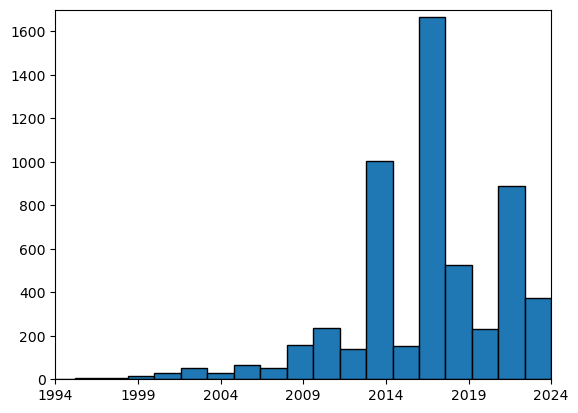

In [84]:
import matplotlib.pyplot as plt

# Inclusive podemos plotar tudo de uma vez só!
exoplanetas_novo["disc_year"].hist(edgecolor="k", bins = 20)    # Mesma coisa de fazer .plot(kind = "hist")

# Como o pandas está chamando o matplotlib indiretamente, 
# podemos inclusive mexer nas coisas pelo plt se achar melhor!
plt.axis([1995, 2024, 0, 1700])
plt.xticks(np.arange(1994, 2025, 5))
plt.grid(False)

<Axes: ylabel='Density'>

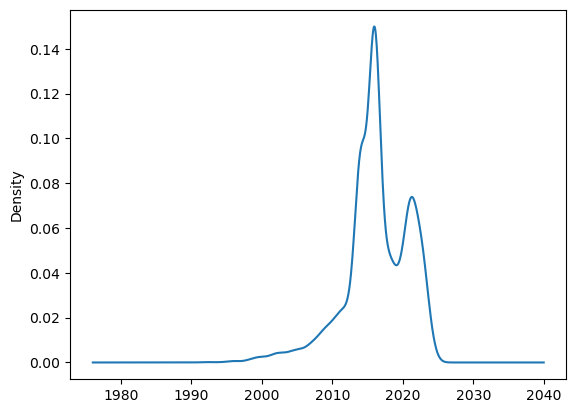

In [85]:
exoplanetas_novo["disc_year"].plot.density() # Ou pode fazer plot.kde()

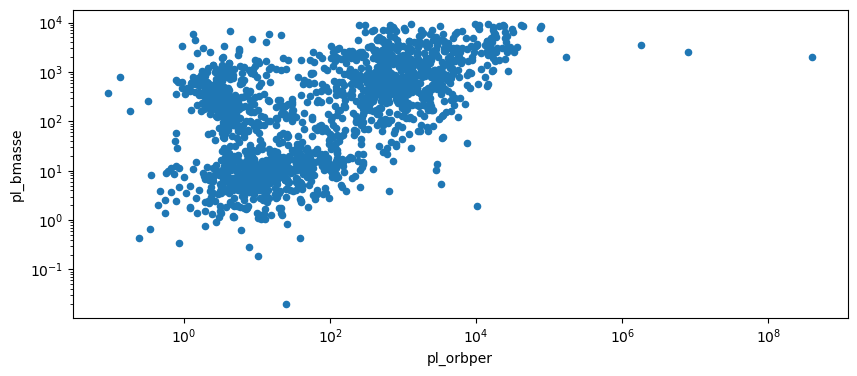

In [86]:
# Gráfico de pontos onde a cor é outra variável
exoplanetas_novo.plot(x="pl_orbper", y="pl_bmasse", kind="scatter", figsize=(10, 4))

# Não tinha mostrado isso antes pra vocês, mas colocando na escala log
plt.xscale("log")
plt.yscale("log")

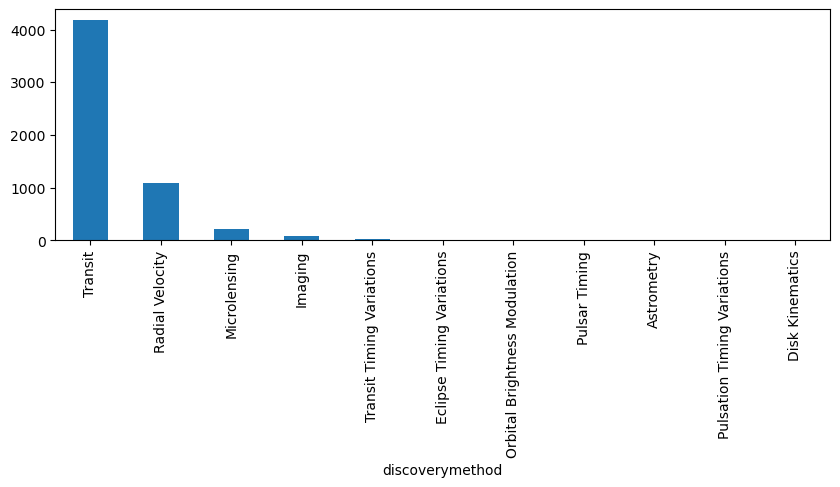

In [87]:
# Para variáveis categóricas, precisamos usar o value_counts()
# Meio estranho de ver não?
exoplanetas_novo["discoverymethod"].value_counts().plot.bar(figsize = (10, 3));

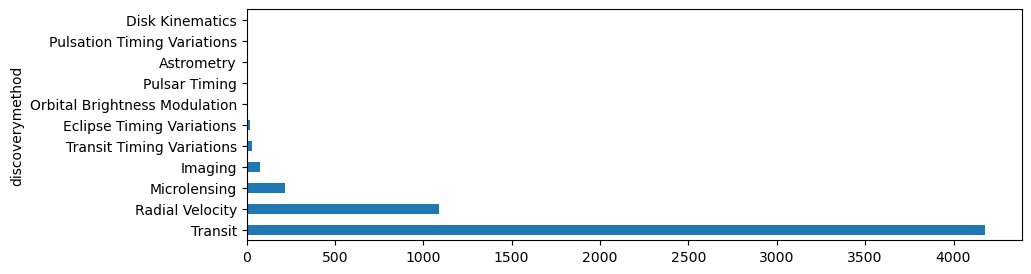

In [88]:
# Vamos usar o barh
exoplanetas_novo["discoverymethod"].value_counts().plot.barh(figsize = (10, 3));

<Axes: >

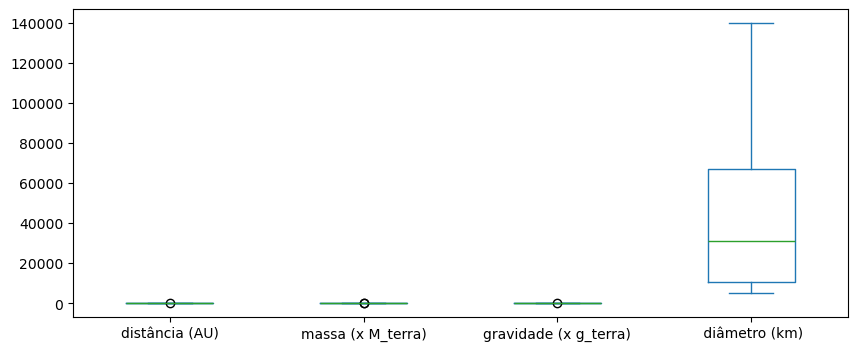

In [89]:
# Podemos usar o boxplot (vamos usar o dataframe menor de planetas que acho que fica melhor para visualizar)
planetas.plot.box(figsize = (10, 4))

<Axes: >

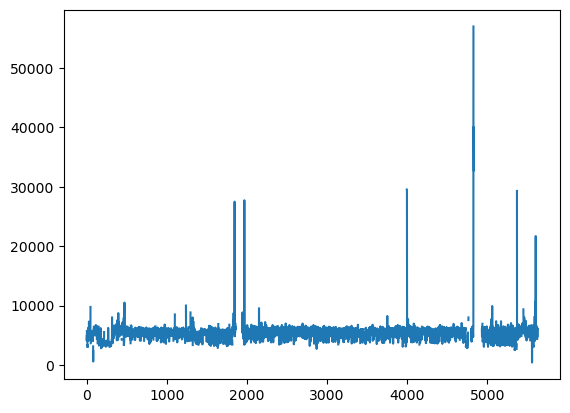

In [90]:
# E o gráfico de linha
exoplanetas_novo["st_teff"].plot(kind="line")   # mesmo que fazer só .plot()

In [133]:
exoplanetas_novo.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'sy_dist', 'sy_disterr1', 'sy_disterr2'],
      dtype='object')

<Axes: >

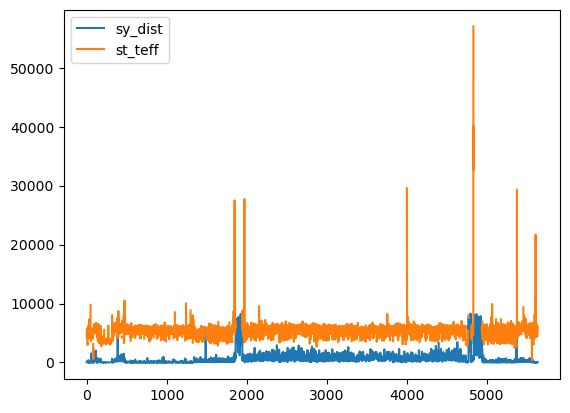

In [141]:
# Podemos construir várias linhas em um só gráfico ao selecionar várias colunas
exoplanetas_novo[['sy_dist', 'st_teff']].plot()

# Ou um em relação ao outro (mas o gráfico não tem sentido para nossos dados)
# exoplanetas_novo.plot(x = 'sy_dist', y = 'st_teff')

# <font color=#005757>7. Exercício final </font>

Considere esse exercício como um grande projeto de limpeza, exploração e análise de dados. Para isso iremos trabalhar com os dados da qualidade do ar de Fortaleza nos mês de janeiro e fevereiro de 2024. Siga cada etapa com calma.

**1) importe o pandas**

**2) Leia o arquivo `qualidade-do-ar-fortaleza.xlsx` onde cada planilha desse arquivo (jan2024 e fev2024) deve ser inserido em uma variável diferente (use `sheet_name` para acessar a planilha). Chame essas variáveis de `janeirio` e `fevereiro`.**

**3) Cheque as informações de cada dataframe**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MÊS                          748 non-null    object 
 1   Óxido de Enxofre             702 non-null    float64
 2   Óxido Nítrico                719 non-null    float64
 3   Dióxido de Nitrogênio        718 non-null    float64
 4   Óxidos de Nitrogênio         719 non-null    float64
 5   Ozônio                       719 non-null    float64
 6   Material Particulado <10µm   720 non-null    float64
 7   Material Particulado <2,5µm  719 non-null    float64
 8   Monóxido de carbono          720 non-null    float64
 9   VelVento (m/s)               700 non-null    float64
 10  DirVento (°)                 700 non-null    float64
 11  T-PM10 (°C)                  722 non-null    float64
 12  UR (%)                       700 non-null    float64
 13  Press (mbar)        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MÊS                          700 non-null    object 
 1   Óxido de Enxofre             626 non-null    float64
 2   Óxido Nítrico                646 non-null    float64
 3   Dióxido de Nitrogênio        646 non-null    float64
 4   Óxidos de Nitrogênio         646 non-null    float64
 5   Ozônio                       647 non-null    float64
 6   Material Particulado <10µm   648 non-null    float64
 7   Material Particulado <2,5µm  648 non-null    float64
 8   Monóxido de carbono          588 non-null    float64
 9   VelVento (m/s)               650 non-null    float64
 10  DirVento (°)                 650 non-null    float64
 11  T-PM10 (°C)                  650 non-null    float64
 12  UR (%)                       650 non-null    float64
 13  Press (mbar)        

**4) Cheque o head dos dataframes**

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/01/2024 00:00,10.0,1.0,8.0,9.0,21.0,31.0,18.0,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0
1,01/01/2024 01:00,7.0,1.0,8.0,10.0,20.0,33.0,22.0,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN
2,01/01/2024 02:00,3.0,2.0,10.0,12.0,18.0,38.0,15.0,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN
3,01/01/2024 03:00,4.0,2.0,10.0,13.0,15.0,25.0,20.0,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN
4,01/01/2024 04:00,3.0,1.0,6.0,7.0,46.0,21.0,18.0,0.2,1.2,81.5,24.8,89.4,1002.1,0.0,29.4,NaN


,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/02/2024 00:00,6.0,0.0,2.0,3.0,44.0,29.0,19.0,0.2,2.4,98.0,28.2,76.7,1003.3,0.0,0.0,0.4
1,01/02/2024 01:00,5.0,0.0,2.0,2.0,45.0,30.0,15.0,0.2,2.6,98.4,28.1,75.2,1002.7,0.0,0.0,NaN
2,01/02/2024 02:00,6.0,0.0,1.0,2.0,47.0,29.0,16.0,0.2,2.5,102.0,28.0,74.8,1002.2,0.0,0.0,NaN
3,01/02/2024 03:00,6.0,0.0,1.0,2.0,47.0,28.0,16.0,0.2,2.2,102.2,28.0,75.4,1002.2,0.0,0.0,NaN
4,01/02/2024 04:00,7.0,0.0,2.0,2.0,48.0,27.0,12.0,0.2,2.2,96.8,27.9,74.9,1002.2,0.0,0.0,NaN


**4) Faça as seguintes limpezas em cada um dos dois DataFrames:**

- Remova os valores `NaN` APENAS da coluna `MÊS`.

- Remova as últimas 4 linhas.

- Resete o índice (não esqueça de fazer `drop=True`).

- Save todas as modificações nas variáveis `janeiro_v1` e `fevereiro_v1`

In [120]:
# Como janeiro_v1 deve parecer

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/01/2024 00:00,10.0,1.0,8.0,9.0,21.0,31.0,18.0,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0
1,01/01/2024 01:00,7.0,1.0,8.0,10.0,20.0,33.0,22.0,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN
2,01/01/2024 02:00,3.0,2.0,10.0,12.0,18.0,38.0,15.0,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN
3,01/01/2024 03:00,4.0,2.0,10.0,13.0,15.0,25.0,20.0,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN
4,01/01/2024 04:00,3.0,1.0,6.0,7.0,46.0,21.0,18.0,0.2,1.2,81.5,24.8,89.4,1002.1,0.0,29.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,31/01/2024 19:00,7.0,1.0,6.0,7.0,39.0,37.0,17.0,0.4,2.4,85.2,28.4,76.3,1001.9,0.0,0.0,NaN
740,31/01/2024 20:00,5.0,1.0,4.0,5.0,43.0,37.0,15.0,0.3,2.8,79.1,28.3,76.1,1002.6,0.0,0.0,NaN
741,31/01/2024 21:00,5.0,0.0,4.0,4.0,42.0,27.0,11.0,0.3,2.4,85.0,28.2,76.6,1003.2,0.0,0.0,NaN
742,31/01/2024 22:00,6.0,0.0,3.0,3.0,40.0,29.0,11.0,0.2,2.6,85.2,28.3,74.6,1003.4,0.0,0.0,NaN


In [121]:
# Como fevereiro_v1 deve parecer

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/02/2024 00:00,6.0,0.0,2.0,3.0,44.0,29.0,19.0,0.2,2.4,98.0,28.2,76.7,1003.3,0.0,0.0,0.4
1,01/02/2024 01:00,5.0,0.0,2.0,2.0,45.0,30.0,15.0,0.2,2.6,98.4,28.1,75.2,1002.7,0.0,0.0,NaN
2,01/02/2024 02:00,6.0,0.0,1.0,2.0,47.0,29.0,16.0,0.2,2.5,102.0,28.0,74.8,1002.2,0.0,0.0,NaN
3,01/02/2024 03:00,6.0,0.0,1.0,2.0,47.0,28.0,16.0,0.2,2.2,102.2,28.0,75.4,1002.2,0.0,0.0,NaN
4,01/02/2024 04:00,7.0,0.0,2.0,2.0,48.0,27.0,12.0,0.2,2.2,96.8,27.9,74.9,1002.2,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,29/02/2024 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,29/02/2024 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,29/02/2024 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,29/02/2024 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**5) Concatene os dois novos DataFrames em um único DataFrame chamado `fortaleza` de tal forma que os dados de fevereiro fique embaixo dos de janeiro. Não esqueça de resetar o índice (use `.reset_index(drop=True)`).**

In [122]:
# Como os dados devem se parecer

,MÊS,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
0,01/01/2024 00:00,10.0,1.0,8.0,9.0,21.0,31.0,18.0,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0
1,01/01/2024 01:00,7.0,1.0,8.0,10.0,20.0,33.0,22.0,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN
2,01/01/2024 02:00,3.0,2.0,10.0,12.0,18.0,38.0,15.0,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN
3,01/01/2024 03:00,4.0,2.0,10.0,13.0,15.0,25.0,20.0,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN
4,01/01/2024 04:00,3.0,1.0,6.0,7.0,46.0,21.0,18.0,0.2,1.2,81.5,24.8,89.4,1002.1,0.0,29.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,29/02/2024 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,29/02/2024 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,29/02/2024 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,29/02/2024 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**6) Agora vamos começar a focar na informação de tempo. Qual é o tipo de dados dos objetos na coluna `MÊS`?**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MÊS                          1440 non-null   object 
 1   Óxido de Enxofre             1322 non-null   float64
 2   Óxido Nítrico                1359 non-null   float64
 3   Dióxido de Nitrogênio        1358 non-null   float64
 4   Óxidos de Nitrogênio         1359 non-null   float64
 5   Ozônio                       1360 non-null   float64
 6   Material Particulado <10µm   1362 non-null   float64
 7   Material Particulado <2,5µm  1361 non-null   float64
 8   Monóxido de carbono          1302 non-null   float64
 9   VelVento (m/s)               1344 non-null   float64
 10  DirVento (°)                 1344 non-null   float64
 11  T-PM10 (°C)                  1366 non-null   float64
 12  UR (%)                       1344 non-null   float64
 13  Press (mbar)      

**7) Você deve ter visto que esses valores ainda são object. Use `pd.to_datetime` para converter essa coluna em objetos `datetime`.**

**OBSERVAÇÃO** Não esqueça de usar `dayfirst=True`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   MÊS                          1440 non-null   datetime64[ns]
 1   Óxido de Enxofre             1322 non-null   float64       
 2   Óxido Nítrico                1359 non-null   float64       
 3   Dióxido de Nitrogênio        1358 non-null   float64       
 4   Óxidos de Nitrogênio         1359 non-null   float64       
 5   Ozônio                       1360 non-null   float64       
 6   Material Particulado <10µm   1362 non-null   float64       
 7   Material Particulado <2,5µm  1361 non-null   float64       
 8   Monóxido de carbono          1302 non-null   float64       
 9   VelVento (m/s)               1344 non-null   float64       
 10  DirVento (°)                 1344 non-null   float64       
 11  T-PM10 (°C)                  1366 non-null 

**8) Agora que a coluna `MÊS` são realmente objetos `datetime`. Faça o seguinte:**

- use `.dt.month` para criar uma nova coluna chama `Mês` (desse jeito) e use `.dt.date` para criar a coluna `Data`.

- use `.replace()` para substituir o 1 pela string `"Janeiro"` e 2 pela string `"Fevereiro"` nessa coluna `Mês`.

- Descarte a coluna `"MÊS"` do DataFrame `fortaleza`.

In [125]:
# Veja como deve ficar:

,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h,Mês,Data
0,10.0,1.0,8.0,9.0,21.0,31.0,18.0,0.3,1.5,8.8,27.5,81.2,1003.1,0.0,0.0,41.0,Janeiro,2024-01-01
1,7.0,1.0,8.0,10.0,20.0,33.0,22.0,0.4,0.9,342.9,27.4,82.6,1002.9,0.0,0.0,NaN,Janeiro,2024-01-01
2,3.0,2.0,10.0,12.0,18.0,38.0,15.0,0.4,0.9,3.8,27.5,83.3,1002.2,0.0,0.2,NaN,Janeiro,2024-01-01
3,4.0,2.0,10.0,13.0,15.0,25.0,20.0,0.4,0.5,308.9,27.0,88.8,1002.0,0.0,0.0,NaN,Janeiro,2024-01-01
4,3.0,1.0,6.0,7.0,46.0,21.0,18.0,0.2,1.2,81.5,24.8,89.4,1002.1,0.0,29.4,NaN,Janeiro,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fevereiro,2024-02-29
1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fevereiro,2024-02-29
1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fevereiro,2024-02-29
1438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fevereiro,2024-02-29


**9) Agora agrupe por esta coluna `Data` usando `.groupby()` com o agregado `mean(numeric_only=True)` e salve em uma variável chamada `por_data`:**

In [131]:
# Como deve parecer o por_data.head()

,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
Data,,,,,,,,,,,,,,,,
2024-01-01,3.958333,2.208333,9.791667,13.041667,29.833333,26.583333,17.791667,0.337500,1.064706,150.417647,26.141667,87.611765,1003.152941,91.117647,2.411765,41.0
2024-01-02,8.833333,5.416667,8.291667,16.791667,20.666667,30.083333,18.916667,0.316667,2.022222,82.511111,27.516667,79.600000,1001.888889,68.111111,0.000000,0.0
2024-01-03,5.875000,2.000000,6.250000,9.250000,24.541667,23.375000,14.041667,0.245833,2.004167,97.308333,27.954167,78.733333,1002.987500,259.833333,0.204167,4.9
2024-01-04,7.958333,1.250000,4.708333,6.791667,29.291667,23.125000,12.041667,0.225000,2.500000,92.766667,28.237500,75.508333,1002.441667,291.208333,0.016667,0.4
2024-01-05,8.666667,2.541667,5.875000,9.791667,25.916667,30.583333,16.833333,0.237500,2.341667,112.541667,28.091667,75.150000,1001.416667,275.708333,0.000000,0.0


**9) Usando esse dataframe `por_data` plote a média desses gases do efeito estufa: `gases = ["Óxido de Enxofre", "Óxido Nítrico", "Dióxido de Nitrogênio", "Óxidos de Nitrogênio", "Ozônio"]`. Faça uma análise discutiva do que você vê.**

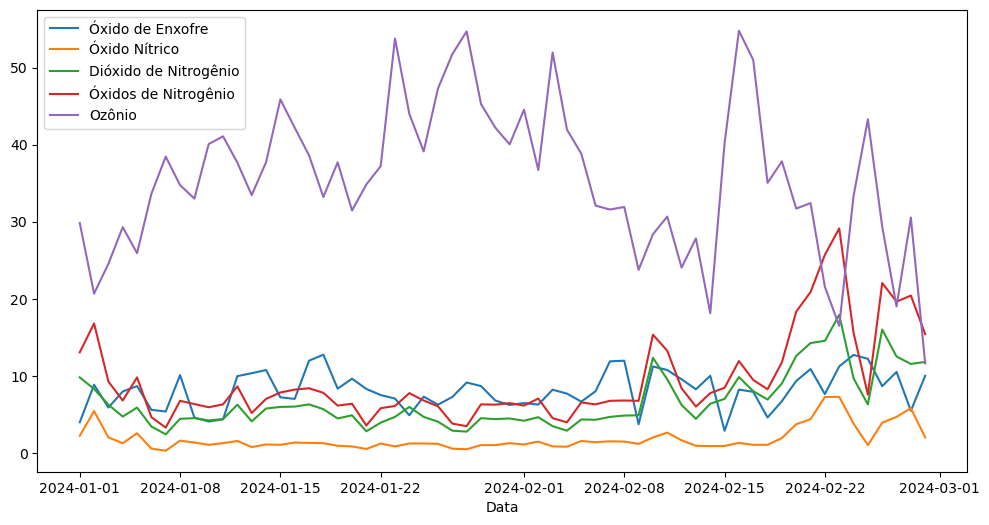

**10) Usando a seleção condicional que aprendemos nesse dataframe `por_data`, responda às seguintes perguntas:**

1. Em qual dia a média de Óxidos de Nitrogênio foi a mais alta? Esse resultado bate com o gráfico?

2. Em qual dia a média de Ozônio foi a mais baixa? Esse resultado bate com o gráfico?

3. Qual era a qualidade do ar no dia mais chuvoso em Fortaleza?

4. Quais foram os dias em que houve chuva durante 24 horas? Coloque em ordem da maior média para a menor.

In [168]:
# Em qual dia a média de Óxidos de Nitrogênio foi a mais alta?

,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
Data,,,,,,,,,,,,,,,,
2024-02-23,11.217391,7.26087,17.913043,29.130435,16.478261,33.0,15.869565,0.521739,0.783333,160.441667,26.125,89.9,1003.308333,93.458333,0.756522,17.4


In [169]:
# Em qual dia a média de Ozônio foi a mais baixa?

,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
Data,,,,,,,,,,,,,,,,
2024-02-29,10.0,2.0,11.8,15.4,11.6,26.6,11.0,0.32,0.62,273.56,24.92,90.82,1003.52,0.0,0.0,0.0


In [170]:
# Qual era a qualidade do ar no dia mais chuvoso em Fortaleza?

,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
Data,,,,,,,,,,,,,,,,
2024-02-10,11.208333,2.0,12.333333,15.333333,28.375,48.916667,28.291667,0.9,1.5375,120.7,25.204167,93.025,1003.775,49.0,3.466667,83.2


In [178]:
# Quais foram os dias em que houve chuva durante 24 horas? Coloque em ordem da maior média para a menor.

,Óxido de Enxofre,Óxido Nítrico,Dióxido de Nitrogênio,Óxidos de Nitrogênio,Ozônio,Material Particulado <10µm,"Material Particulado <2,5µm",Monóxido de carbono,VelVento (m/s),DirVento (°),T-PM10 (°C),UR (%),Press (mbar),RadSol (W/m²),Chuva,chuva 24h
Data,,,,,,,,,,,,,,,,
2024-02-10,11.208333,2.000000,12.333333,15.333333,28.375000,48.916667,28.291667,0.900000,1.537500,120.700000,25.204167,93.025000,1003.775000,49.000000,3.466667,83.2
2024-02-11,10.750000,2.625000,9.541667,13.250000,30.666667,34.458333,18.541667,0.341667,1.162500,162.454167,25.216667,90.933333,1003.091667,82.916667,3.220833,77.3
2024-02-26,8.652174,3.909091,16.000000,22.045455,29.363636,20.416667,12.458333,0.295455,1.200000,193.833333,25.062500,93.504167,1001.550000,92.916667,2.895833,69.5
2024-02-19,6.708333,1.916667,9.000000,11.750000,37.833333,26.333333,15.166667,0.316667,1.645833,95.612500,26.854167,86.758333,1001.241667,143.333333,2.179167,52.3
2024-01-01,3.958333,2.208333,9.791667,13.041667,29.833333,26.583333,17.791667,0.337500,1.064706,150.417647,26.141667,87.611765,1003.152941,91.117647,2.411765,41.0
2024-02-27,10.500000,4.666667,12.500000,19.625000,19.000000,21.916667,15.125000,0.316667,1.129167,158.591667,24.962500,95.662500,1001.420833,77.250000,1.170833,28.1
2024-02-13,8.250000,0.916667,4.416667,6.000000,27.833333,26.666667,17.416667,0.195833,2.116667,106.354167,27.495833,83.733333,1003.304167,137.000000,0.812500,19.5
2024-02-23,11.217391,7.260870,17.913043,29.130435,16.478261,33.000000,15.869565,0.521739,0.783333,160.441667,26.125000,89.900000,1003.308333,93.458333,0.756522,17.4
2024-02-21,10.875000,4.375000,14.250000,20.875000,32.416667,25.333333,13.875000,0.408333,1.062500,114.579167,25.637500,89.341667,1001.883333,115.166667,0.583333,14.0
